<a href="https://colab.research.google.com/github/how-to-train-your-model/data-science-portfolio/blob/main/ML_Company_Bankruptcy_Prediction_Advance_Modeling_M5_PP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 4: Company Bankruptcy Prediction (Kaggle)

### Author: Pankaj Pant











# Project Details

Management/Research Question
In layman’s terms, what is the management/research question of interest, and why would anyone care?  


**Requirements**

 - Conduct your analysis using a cross-validation design.
 - Conduct / improve upon previous EDA.
 - Build the following models at a minimum.
     - Random Forest Classifier
     - Gradient Boosted Trees
     - Extra Trees
 - Conduct hyperparameter tuning for the following at a minimum.
     - n_estimators (number of trees)
     - max_features (maximum features considered for splitting a node)
     - max_depth (maximum number of levels in each tree)
     - splitting criteria (entropy or gini)
 - Compare your models using the F1-Score on a 20% validation set.
 - Generate predictions from your models, and submit at least two models to Kaggle.com for evaluation. Provide your Kaggle.com user name and a screen snapshot of your scores.











#Importing Packages

In [1]:
#!pip install pwlf
!pip install sklearn.utils.testing

ERROR: Could not find a version that satisfies the requirement sklearn.utils.testing (from versions: none)
ERROR: No matching distribution found for sklearn.utils.testing


In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats

import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import plotly.express as px
#import pwlf

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score, make_scorer

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_predict 
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import cross_validate
from sklearn import preprocessing
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn import model_selection
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import LeavePOut
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier, ExtraTreesClassifier





%matplotlib inline
sns.set()

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning

In [3]:
# Allows for muliple output in one cell window
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#Allows for viewing the complete data in a single window 
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [4]:
#cd nbconvert

In [5]:
#!pip install -e .

In [6]:
#!apt-get install pandoc


In [7]:
#!apt-get update
#!apt-get install inkscape
#!add-apt-repository universe
#!add-apt-repository ppa:inkscape.dev/stable
#!apt-get update
#!apt install inkscape

# Ingestion
### Connect to google drive and import training and test data

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
!ls -l "/content/drive/My Drive/Colab_Notebooks/MSDS-422/W4"

total 16799
-rw------- 1 root root 11456101 Feb 14  2021  Company_Bankruptcy_Prediction.csv
-rw------- 1 root root      143 Feb  2 11:46 'M4_A1_Company Bankruptcy Prediction.gdoc'
-rw------- 1 root root      143 Feb  7 07:00 'Module 5 Assignment 2-Bankrupty Prediction (Kaggle) .gdoc'
-rw------- 1 root root  2139464 Feb  4 21:51 'PP_M4_Company Bankruptcy Prediction.ipynb'
-rw------- 1 root root  3604512 Feb  1 02:07  Rough_M4_House_Prices_Advance_Regression_Techniques.ipynb


In [10]:
#Generalize the file path 
w4_files = "/content/drive/My Drive/Colab_Notebooks/MSDS-422/W4"

In [11]:
#Create dataframe
full_df = pd.read_csv(w4_files+"/Company_Bankruptcy_Prediction.csv")
full_df.shape



(6819, 96)

### Balance the Data


In [92]:
full_df.groupby("Bankrupt?")["Bankrupt?"].count()


Bankrupt?
0    6599
1     220
Name: Bankrupt?, dtype: int64

In [12]:
#Take sample to balance the data
bankrupt_sample = full_df[full_df['Bankrupt?'] == 0][0:400]
non_bankrupt_sample = full_df[full_df['Bankrupt?'] == 1]
#create new data frame
comp_df = pd.concat([bankrupt_sample,non_bankrupt_sample],axis = 0)
comp_df.head()
comp_df.shape

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
6,0,0.390923,0.445704,0.436158,0.619950,0.619950,0.998993,0.797012,0.808960,0.302814,0.781180,3.984834e-04,7.300000e+08,0.461020,0.000805,0.000000,0.158822,0.158822,0.158822,0.161482,0.316687,0.030915,0.099910,0.128945,0.022112,0.848322,0.688590,0.688590,0.217604,5.720000e+09,0.000352,0.263032,0.375303,0.004672,0.002869,0.629988,0.024441,0.216102,0.783898,0.005005,0.384999,0.008044,0.099866,0.127939,0.400574,0.100450,0.001662,0.003805,0.000162,0.000145,0.040806,0.011460,0.393173,0.009703,0.729416,0.255093,0.295221,0.022989,0.003974,0.001050,0.115920,0.340081,0.276643,0.002159,0.508089,0.728731,0.337392,0.009347,0.911441,0.002121,0.092802,1.058011e-04,9.560000e+09,0.593893,2.390000e+09,0.671562,0.355854,0.508089,0.337392,0.120561,0.630419,0.457785,0.560653,0.310296,0.060765,0,0.736619,0.018372,0.623655,0.619949,0.829980,0.292504,0.026622,0.564200,1,0.015663
7,0,0.508361,0.570922,0.559077,0.601738,0.601717,0.999009,0.797449,0.809362,0.303545,0.781621,9.000000e+09,5.090000e+07,0.467024,0.000630,0.157607,0.176984,0.176984,0.176984,0.225206,0.324114,0.042561,0.104796,0.180462,0.022114,0.848082,0.689535,0.689535,0.217633,6.630000e+09,0.000451,0.264112,0.384235,0.009657,0.007305,0.631379,0.005278,0.108202,0.891798,0.005640,0.374219,0.006383,0.104784,0.179519,0.400883,0.218891,0.001335,0.004740,0.000199,0.000518,0.04629

(620, 96)

In [93]:
comp_df.groupby("Bankrupt?")["Bankrupt?"].count()


Bankrupt?
0    400
1    220
Name: Bankrupt?, dtype: int64

In [13]:
# Train Test split

train_df, test_df = train_test_split(comp_df, test_size=0.2)

In [14]:
# EDA Step1: Analyze shape, info and describe the dataset and check for NULLs
print('shape:---',train_df.shape)
train_df['Bankrupt?'].value_counts().sort_values(ascending = True)
#print('\n\n',train_df.info())

print('shape:---',test_df.shape)
test_df['Bankrupt?'].value_counts().sort_values(ascending = True)
##print('\n\n',test_df.info())

shape:--- (496, 96)


1    177
0    319
Name: Bankrupt?, dtype: int64

shape:--- (124, 96)


1    43
0    81
Name: Bankrupt?, dtype: int64

Training dataset has 5455 rows and 96 columns while test data has 1364 records and 96 columns.

In [15]:
# describe

train_df.describe()

print('\n********Describe both numerical and non-numeric (categorical) variables********\n')

train_df.describe(include = "all")

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,4.960000e+02,4.960000e+02,496.000000,4.960000e+02,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,4.960000e+02,4.960000e+02,496.000000,496.000000,496.000000,4.960000e+02,496.000000,4.960000e+02,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,4.960000e+02,4.960000e+02,4.960000e+02,496.000000,496.000000,496.000000,4.960000e+02,496.000000,496.000000,496.000000,496.000000,496.000000,4.960000e+02,496.000000,496.000000,496.000000,4.960000e+02,496.000000,496.000000,496.000000,4.960000e+02,496.000000,496.000000,496.000000,4.960000e+02,4.960000e+02,496.000000,4.960000e+02,496.000000,4.960000e+02,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,4.960000e+02,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.0,496.000000
mean,0.356855,0.464002,0.512635,0.511531,0.601639,0.601657,0.998901,0.797126,0.809059,0.303208,0.781311,2.520931e+09,1.156344e+09,0.465161,2.641129e+06,0.084058,0.172282,0.172221,0.172307,0.208351,0.319719,0.027365,0.096072,0.165313,0.022


********Describe both numerical and non-numeric (categorical) variables********



,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,4.960000e+02,4.960000e+02,496.000000,4.960000e+02,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,4.960000e+02,4.960000e+02,496.000000,496.000000,496.000000,4.960000e+02,496.000000,4.960000e+02,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,4.960000e+02,4.960000e+02,4.960000e+02,496.000000,496.000000,496.000000,4.960000e+02,496.000000,496.000000,496.000000,496.000000,496.000000,4.960000e+02,496.000000,496.000000,496.000000,4.960000e+02,496.000000,496.000000,496.000000,4.960000e+02,496.000000,496.000000,496.000000,4.960000e+02,4.960000e+02,496.000000,4.960000e+02,496.000000,4.960000e+02,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,4.960000e+02,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.0,496.000000
mean,0.356855,0.464002,0.512635,0.511531,0.601639,0.601657,0.998901,0.797126,0.809059,0.303208,0.781311,2.520931e+09,1.156344e+09,0.465161,2.641129e+06,0.084058,0.172282,0.172221,0.172307,0.208351,0.319719,0.027365,0.096072,0.165313,0.022

In [16]:
#finding fields with NULL values

train_df.isnull().sum().sum()
#print('\n\n',train_df.info())

0

In [17]:
data_type = pd.concat([train_df.dtypes], axis=1, keys=['DType'])

catg_var = data_type[(data_type.DType == "object")]
catg_var.count()
num_var = data_type[(data_type.DType != "object")]
num_var.count()

DType    0
dtype: int64

DType    96
dtype: int64

In [18]:
#NA values
train_df.isna().sum().sum()


0

In [19]:
# Identify categorical and numerical variables using Dtype column from .info() output

non_object = train_df.dtypes[train_df.dtypes != "object"].index
#print("Number of Numerical features: ", len(non_object))

objects = train_df.dtypes[train_df.dtypes == "object"].index
#print("Number of Cateforical features: ", len(objects))



num_fields = []
cat_fields = []


for i in range(len(non_object)):
  num_fields.append(non_object[i])

for i in range(len(objects)):
  cat_fields.append(objects[i])



print('\n')
print("Number of Numerical features: ",len(num_fields))
print('\n')
print("Number of Categorical features: ",len(cat_fields))




Number of Numerical features:  96


Number of Categorical features:  0


# **EDA**
<font color='lightblue'>We will apply a few EDA techniques:


1.   “Skewness essentially measures the symmetry of the distribution, while kurtosis determines the heaviness of the distribution tails.”
https://www.analyticsvidhya.com/blog/2021/05/shape-of-data-skewness-and-kurtosis/
2.   Data Visualization



</font>

### <font color='lightblue'></font>

In [20]:
data = []
for i in num_fields:
  data.append([i, round(train_df[i].skew(),2), round(train_df[i].kurt(),2)])

df_sk = pd.DataFrame(data, columns=['Num_Field','Skewness','Kurtosis'])
df_sk.sort_values(by= ['Skewness'],ascending=False)

,Num_Field,Skewness,Kurtosis
36,Total debt/Total net worth,22.27,496.00
76,Fixed Assets to Assets,22.27,496.00
47,Average Collection Days,22.27,496.00
34,Quick Ratio,22.27,496.00
53,Allocation rate per person,22.27,496.00
30,Net Value Growth Rate,22.27,496.00
41,Contingent liabilities/Net worth,22.25,495.31
46,Accounts Receivable Turnover,21.59,474.51
88,No-credit Interval,20.88,453.46
39,Long-term fund suitability ratio (A),20.72,444.59


For skewness, if the value is greater than + 1.0, the distribution is right skewed. If the value is less than -1.0, the distribution is left skewed. For kurtosis, if the value is greater than + 1.0, the distribution is leptokurtik. If the value is less than -1.0, the distribution is platykurtik.

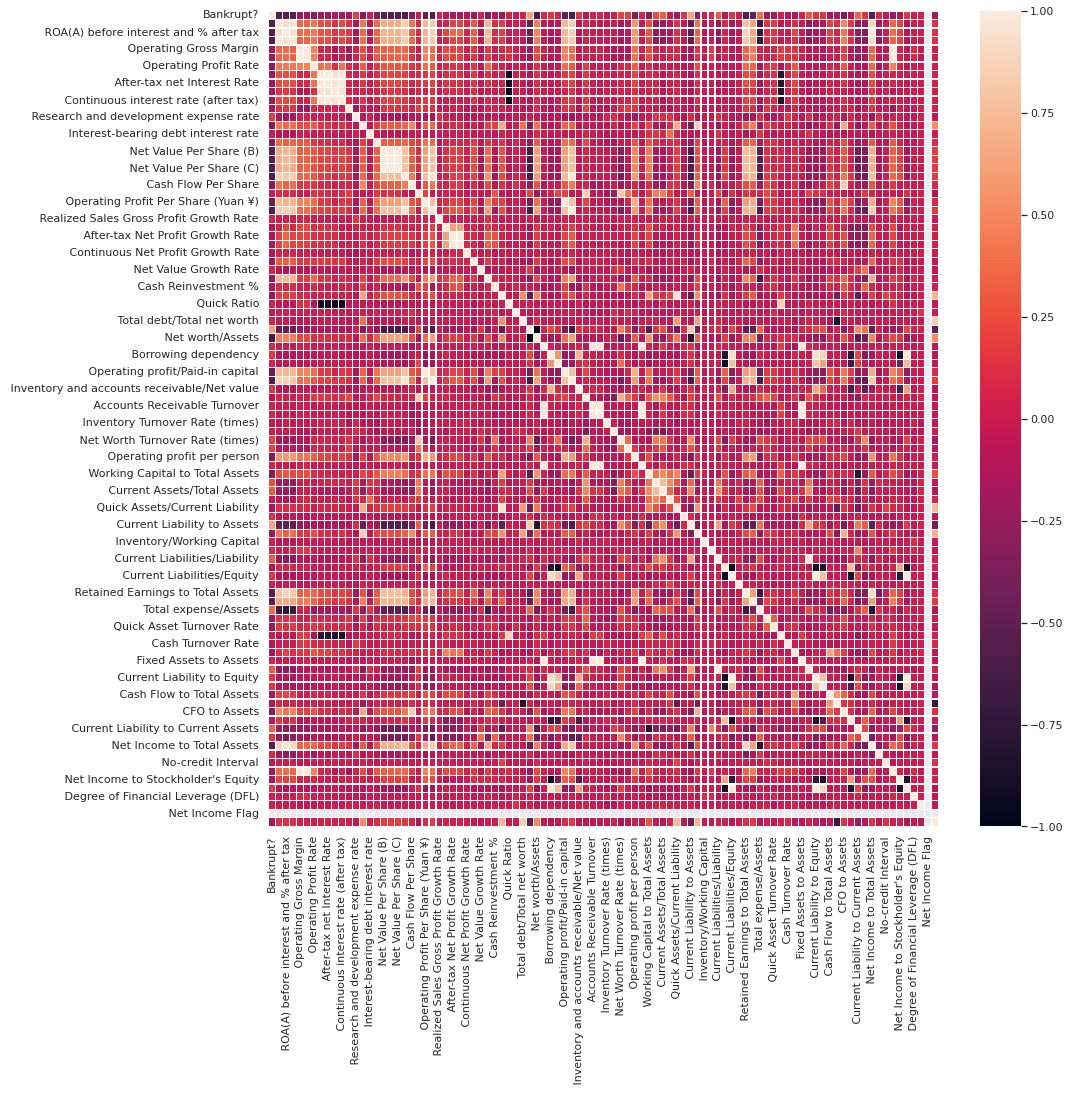

In [21]:
corr = train_df.corr()
fig, ax = plt.subplots(figsize = (15,15))
sns.heatmap(corr, ax = ax, linewidth = 0.1)

Bankrupt?
0    319
1    177
Name: Bankrupt?, dtype: int64

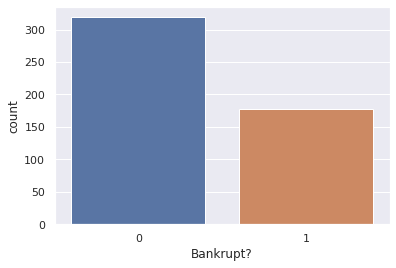

In [22]:
train_df.groupby("Bankrupt?")["Bankrupt?"].count()


sns.countplot(x = 'Bankrupt?', data = train_df)

In [23]:
print('duplicates',train_df.duplicated().sum())


duplicates 0


In [24]:
# The data is skewed

print(train_df['Bankrupt?'].value_counts())


print('No Bankruptcy: ', round(train_df['Bankrupt?'].value_counts()[0]/len(train_df) * 100,2), '%')
print('Bankruptcy: ', round(train_df['Bankrupt?'].value_counts()[1]/len(train_df) * 100,2), '%')

0    319
1    177
Name: Bankrupt?, dtype: int64
No Bankruptcy:  64.31 %
Bankruptcy:  35.69 %


Text(0.5, 1.0, 'Bankrupt vs Net Income to Total Assets')

Text(0.5, 1.0, 'Bankrupt vs Tot Debt/Net worth Correlation')

Text(0.5, 1.0, 'Bankrupt vs Current Asset Turnover Rate')

Text(0.5, 1.0, 'Bankrupt vs Net Worth/Assets Correlation')

Text(0.5, 1.0, 'Bankrupt vs  working capital to total assets')

Text(0.5, 1.0, 'Bankrupt vs cash / total assets')

Text(0.5, 1.0, 'Bankrupt vs current liability to assets')

Text(0.5, 1.0, 'Bankrupt vs  Retained Earnings to Total Assets')

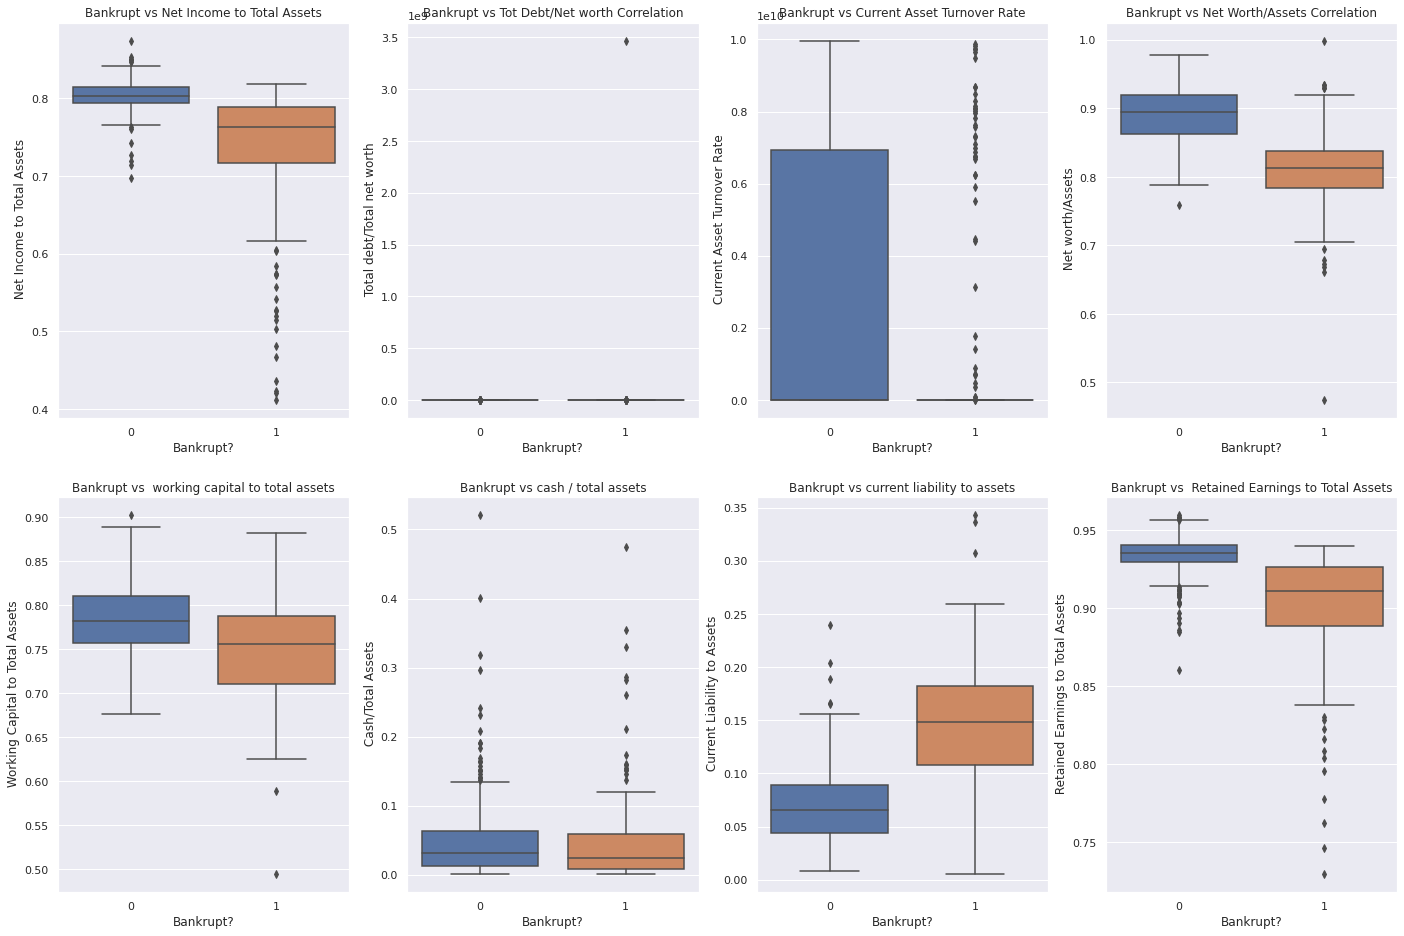

In [25]:
# Plot and analyze a few of the features

# Plotting interesting features

f, axes = plt.subplots(nrows = 2, ncols=4, figsize=(24,16))

sns.boxplot(x='Bankrupt?', y=" Net Income to Total Assets", data=train_df, ax=axes[0,0])
axes[0,0].set_title('Bankrupt vs Net Income to Total Assets')

sns.boxplot(x='Bankrupt?', y=" Total debt/Total net worth", data=train_df, ax=axes[0,1]) 
axes[0,1].set_title('Bankrupt vs Tot Debt/Net worth Correlation')


sns.boxplot(x='Bankrupt?', y=" Current Asset Turnover Rate", data=train_df, ax=axes[0,2])
axes[0,2].set_title('Bankrupt vs Current Asset Turnover Rate')


sns.boxplot(x='Bankrupt?', y=" Net worth/Assets", data=train_df, ax=axes[0,3])  
axes[0,3].set_title('Bankrupt vs Net Worth/Assets Correlation') 

sns.boxplot(x='Bankrupt?', y=" Working Capital to Total Assets", data=train_df, ax=axes[1,0])
axes[1,0].set_title('Bankrupt vs  working capital to total assets')

sns.boxplot(x='Bankrupt?', y=" Cash/Total Assets", data=train_df, ax=axes[1,1])
axes[1,1].set_title('Bankrupt vs cash / total assets')


sns.boxplot(x='Bankrupt?', y=" Current Liability to Assets", data=train_df, ax=axes[1,2])
axes[1,2].set_title('Bankrupt vs current liability to assets')


sns.boxplot(x='Bankrupt?', y=" Retained Earnings to Total Assets", data=train_df, ax=axes[1,3])
axes[1,3].set_title('Bankrupt vs  Retained Earnings to Total Assets')

plt.show()

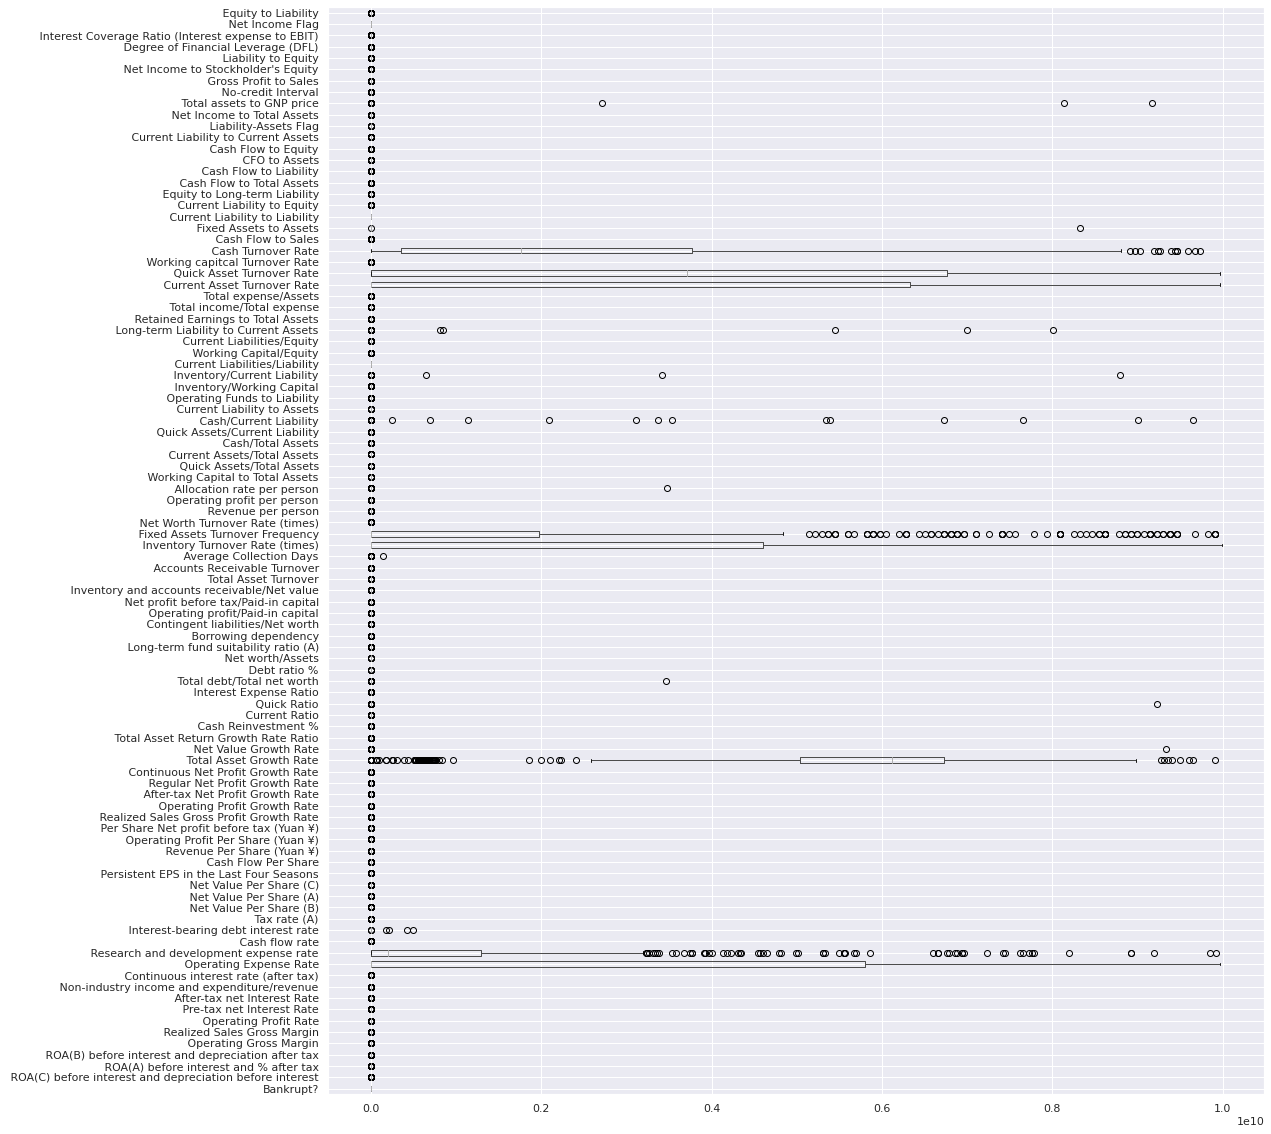

In [26]:
# Understanding Outliers

train_df.boxplot(vert=False,figsize= (20,20))
plt.subplots_adjust(left=0.25)
plt.show()

In [27]:
corr = train_df[num_fields].corr()
corrl = corr.nlargest(len(num_fields), 'Bankrupt?')['Bankrupt?']

corrl

Bankrupt?                                                   1.000000
 Current Liability to Assets                                0.641740
 Debt ratio %                                               0.632230
 Total expense/Assets                                       0.384153
 Current Liability to Current Assets                        0.342665
 Current Assets/Total Assets                                0.321872
 Current Liabilities/Liability                              0.299161
 Current Liability to Liability                             0.299161
 Quick Assets/Total Assets                                  0.257001
 Revenue per person                                         0.210345
 Net Worth Turnover Rate (times)                            0.200775
 Research and development expense rate                      0.194793
 Borrowing dependency                                       0.164676
 Liability to Equity                                        0.156730
 Equity to Long-term Liability    

In [28]:
# Find variables with correlation > .50

corr = train_df.corr()
corrl = corr.nlargest(len(num_fields), 'Bankrupt?')['Bankrupt?']
corr_cols = corr.abs().nlargest(30,'Bankrupt?')['Bankrupt?'].index

#corr_pos.remove('Bankrupt?')

print(corr_cols)




Index(['Bankrupt?', ' Current Liability to Assets', ' Net worth/Assets', ' Debt ratio %', ' Persistent EPS in the Last Four Seasons', ' Per Share Net profit before tax (Yuan ¥)', ' Net profit before tax/Paid-in capital', ' ROA(B) before interest and depreciation after tax', ' ROA(C) before interest and depreciation before interest', ' Retained Earnings to Total Assets', ' ROA(A) before interest and % after tax', ' Net Value Per Share (B)', ' Net Value Per Share (A)', ' Net Value Per Share (C)', ' Net Income to Total Assets', ' Total income/Total expense', ' Operating profit/Paid-in capital', ' Operating Profit Per Share (Yuan ¥)', ' Total expense/Assets', ' Operating profit per person', ' Current Liability to Current Assets', ' Cash flow rate', ' CFO to Assets', ' Current Assets/Total Assets', ' Cash Flow Per Share', ' Working Capital to Total Assets', ' Tax rate (A)', ' Current Liabilities/Liability', ' Current Liability to Liability', ' Total Asset Return Growth Rate Ratio'], dtype='

In [29]:
def display_stat(col, df):
  num_cols = col
  train = df
  for i in range(len(col)):
    mean = train[num_cols[i]].mean()
    std = train[num_cols[i]].std()
    skew = train[num_cols[i]].skew()
    kurtosis = train[num_cols[i]].kurtosis()
    print(num_cols[i]+':')
    print('mean: {0:.4f}, std: {1:.4f}, skew: {2:.4f}, kurtosis: {3:.4f} '.format(mean, std, skew, kurtosis))

In [30]:
display_stat(corr_cols, train_df)

Bankrupt?:
mean: 0.3569, std: 0.4796, skew: 0.5994, kurtosis: -1.6474 
 Current Liability to Assets:
mean: 0.0979, std: 0.0574, skew: 0.9663, kurtosis: 0.9399 
 Net worth/Assets:
mean: 0.8622, std: 0.0611, skew: -0.9377, kurtosis: 2.9930 
 Debt ratio %:
mean: 0.1378, std: 0.0611, skew: 0.9377, kurtosis: 2.9930 
 Persistent EPS in the Last Four Seasons:
mean: 0.2084, std: 0.0266, skew: -2.1811, kurtosis: 10.3885 
 Per Share Net profit before tax (Yuan ¥):
mean: 0.1653, std: 0.0242, skew: -1.9124, kurtosis: 7.1497 
 Net profit before tax/Paid-in capital:
mean: 0.1647, std: 0.0235, skew: -1.9519, kurtosis: 7.7387 
 ROA(B) before interest and depreciation after tax:
mean: 0.5115, std: 0.0759, skew: -2.6555, kurtosis: 10.1824 
 ROA(C) before interest and depreciation before interest:
mean: 0.4640, std: 0.0685, skew: -2.4210, kurtosis: 9.3374 
 Retained Earnings to Total Assets:
mean: 0.9222, std: 0.0291, skew: -2.8721, kurtosis: 11.2814 
 ROA(A) before interest and % after tax:
mean: 0.5126

##**MinMaxScaler**

Rescale the data so that all feature values are between 0 and 1. However, if there is an outlier, the transformed value may be compressed into a very narrow range.

In other words, MinMaxScaler is also very sensitive to the existence of outliers.

Text(0.5, 1.0, 'Orginal Bankrupt?')

Text(0.5, 1.0, 'MinMax Scaling Bankrupt?')

Text(0.5, 1.0, 'MinMax Scaling Bankrupt?')

((array([-2.98964743e+00, -2.70749616e+00, -2.54882739e+00, -2.43631222e+00,
         -2.34814521e+00, -2.27515794e+00, -2.21259253e+00, -2.15765014e+00,
         -2.10853966e+00, -2.06404311e+00, -2.02329325e+00, -1.98564987e+00,
         -1.95062637e+00, -1.91784395e+00, -1.88700172e+00, -1.85785656e+00,
         -1.83020909e+00, -1.80389370e+00, -1.77877129e+00, -1.75472383e+00,
         -1.73165026e+00, -1.70946341e+00, -1.68808748e+00, -1.66745618e+00,
         -1.64751116e+00, -1.62820079e+00, -1.60947916e+00, -1.59130522e+00,
         -1.57364218e+00, -1.55645688e+00, -1.53971934e+00, -1.52340235e+00,
         -1.50748117e+00, -1.49193319e+00, -1.47673773e+00, -1.46187581e+00,
         -1.44732993e+00, -1.43308400e+00, -1.41912312e+00, -1.40543348e+00,
         -1.39200227e+00, -1.37881758e+00, -1.36586832e+00, -1.35314413e+00,
         -1.34063532e+00, -1.32833284e+00, -1.31622818e+00, -1.30431336e+00,
         -1.29258088e+00, -1.28102368e+00, -1.26963510e+00, -1.25840885e+00,

Text(0.5, 1.0, 'Orginal  ROA(C) before interest and depreciation before interest')

Text(0.5, 1.0, 'MinMax Scaling  ROA(C) before interest and depreciation before interest')

Text(0.5, 1.0, 'MinMax Scaling  ROA(C) before interest and depreciation before interest')

((array([-2.98964743e+00, -2.70749616e+00, -2.54882739e+00, -2.43631222e+00,
         -2.34814521e+00, -2.27515794e+00, -2.21259253e+00, -2.15765014e+00,
         -2.10853966e+00, -2.06404311e+00, -2.02329325e+00, -1.98564987e+00,
         -1.95062637e+00, -1.91784395e+00, -1.88700172e+00, -1.85785656e+00,
         -1.83020909e+00, -1.80389370e+00, -1.77877129e+00, -1.75472383e+00,
         -1.73165026e+00, -1.70946341e+00, -1.68808748e+00, -1.66745618e+00,
         -1.64751116e+00, -1.62820079e+00, -1.60947916e+00, -1.59130522e+00,
         -1.57364218e+00, -1.55645688e+00, -1.53971934e+00, -1.52340235e+00,
         -1.50748117e+00, -1.49193319e+00, -1.47673773e+00, -1.46187581e+00,
         -1.44732993e+00, -1.43308400e+00, -1.41912312e+00, -1.40543348e+00,
         -1.39200227e+00, -1.37881758e+00, -1.36586832e+00, -1.35314413e+00,
         -1.34063532e+00, -1.32833284e+00, -1.31622818e+00, -1.30431336e+00,
         -1.29258088e+00, -1.28102368e+00, -1.26963510e+00, -1.25840885e+00,

Text(0.5, 1.0, 'Orginal  ROA(A) before interest and % after tax')

Text(0.5, 1.0, 'MinMax Scaling  ROA(A) before interest and % after tax')

Text(0.5, 1.0, 'MinMax Scaling  ROA(A) before interest and % after tax')

((array([-2.98964743e+00, -2.70749616e+00, -2.54882739e+00, -2.43631222e+00,
         -2.34814521e+00, -2.27515794e+00, -2.21259253e+00, -2.15765014e+00,
         -2.10853966e+00, -2.06404311e+00, -2.02329325e+00, -1.98564987e+00,
         -1.95062637e+00, -1.91784395e+00, -1.88700172e+00, -1.85785656e+00,
         -1.83020909e+00, -1.80389370e+00, -1.77877129e+00, -1.75472383e+00,
         -1.73165026e+00, -1.70946341e+00, -1.68808748e+00, -1.66745618e+00,
         -1.64751116e+00, -1.62820079e+00, -1.60947916e+00, -1.59130522e+00,
         -1.57364218e+00, -1.55645688e+00, -1.53971934e+00, -1.52340235e+00,
         -1.50748117e+00, -1.49193319e+00, -1.47673773e+00, -1.46187581e+00,
         -1.44732993e+00, -1.43308400e+00, -1.41912312e+00, -1.40543348e+00,
         -1.39200227e+00, -1.37881758e+00, -1.36586832e+00, -1.35314413e+00,
         -1.34063532e+00, -1.32833284e+00, -1.31622818e+00, -1.30431336e+00,
         -1.29258088e+00, -1.28102368e+00, -1.26963510e+00, -1.25840885e+00,

Text(0.5, 1.0, 'Orginal  ROA(B) before interest and depreciation after tax')

Text(0.5, 1.0, 'MinMax Scaling  ROA(B) before interest and depreciation after tax')

Text(0.5, 1.0, 'MinMax Scaling  ROA(B) before interest and depreciation after tax')

((array([-2.98964743e+00, -2.70749616e+00, -2.54882739e+00, -2.43631222e+00,
         -2.34814521e+00, -2.27515794e+00, -2.21259253e+00, -2.15765014e+00,
         -2.10853966e+00, -2.06404311e+00, -2.02329325e+00, -1.98564987e+00,
         -1.95062637e+00, -1.91784395e+00, -1.88700172e+00, -1.85785656e+00,
         -1.83020909e+00, -1.80389370e+00, -1.77877129e+00, -1.75472383e+00,
         -1.73165026e+00, -1.70946341e+00, -1.68808748e+00, -1.66745618e+00,
         -1.64751116e+00, -1.62820079e+00, -1.60947916e+00, -1.59130522e+00,
         -1.57364218e+00, -1.55645688e+00, -1.53971934e+00, -1.52340235e+00,
         -1.50748117e+00, -1.49193319e+00, -1.47673773e+00, -1.46187581e+00,
         -1.44732993e+00, -1.43308400e+00, -1.41912312e+00, -1.40543348e+00,
         -1.39200227e+00, -1.37881758e+00, -1.36586832e+00, -1.35314413e+00,
         -1.34063532e+00, -1.32833284e+00, -1.31622818e+00, -1.30431336e+00,
         -1.29258088e+00, -1.28102368e+00, -1.26963510e+00, -1.25840885e+00,

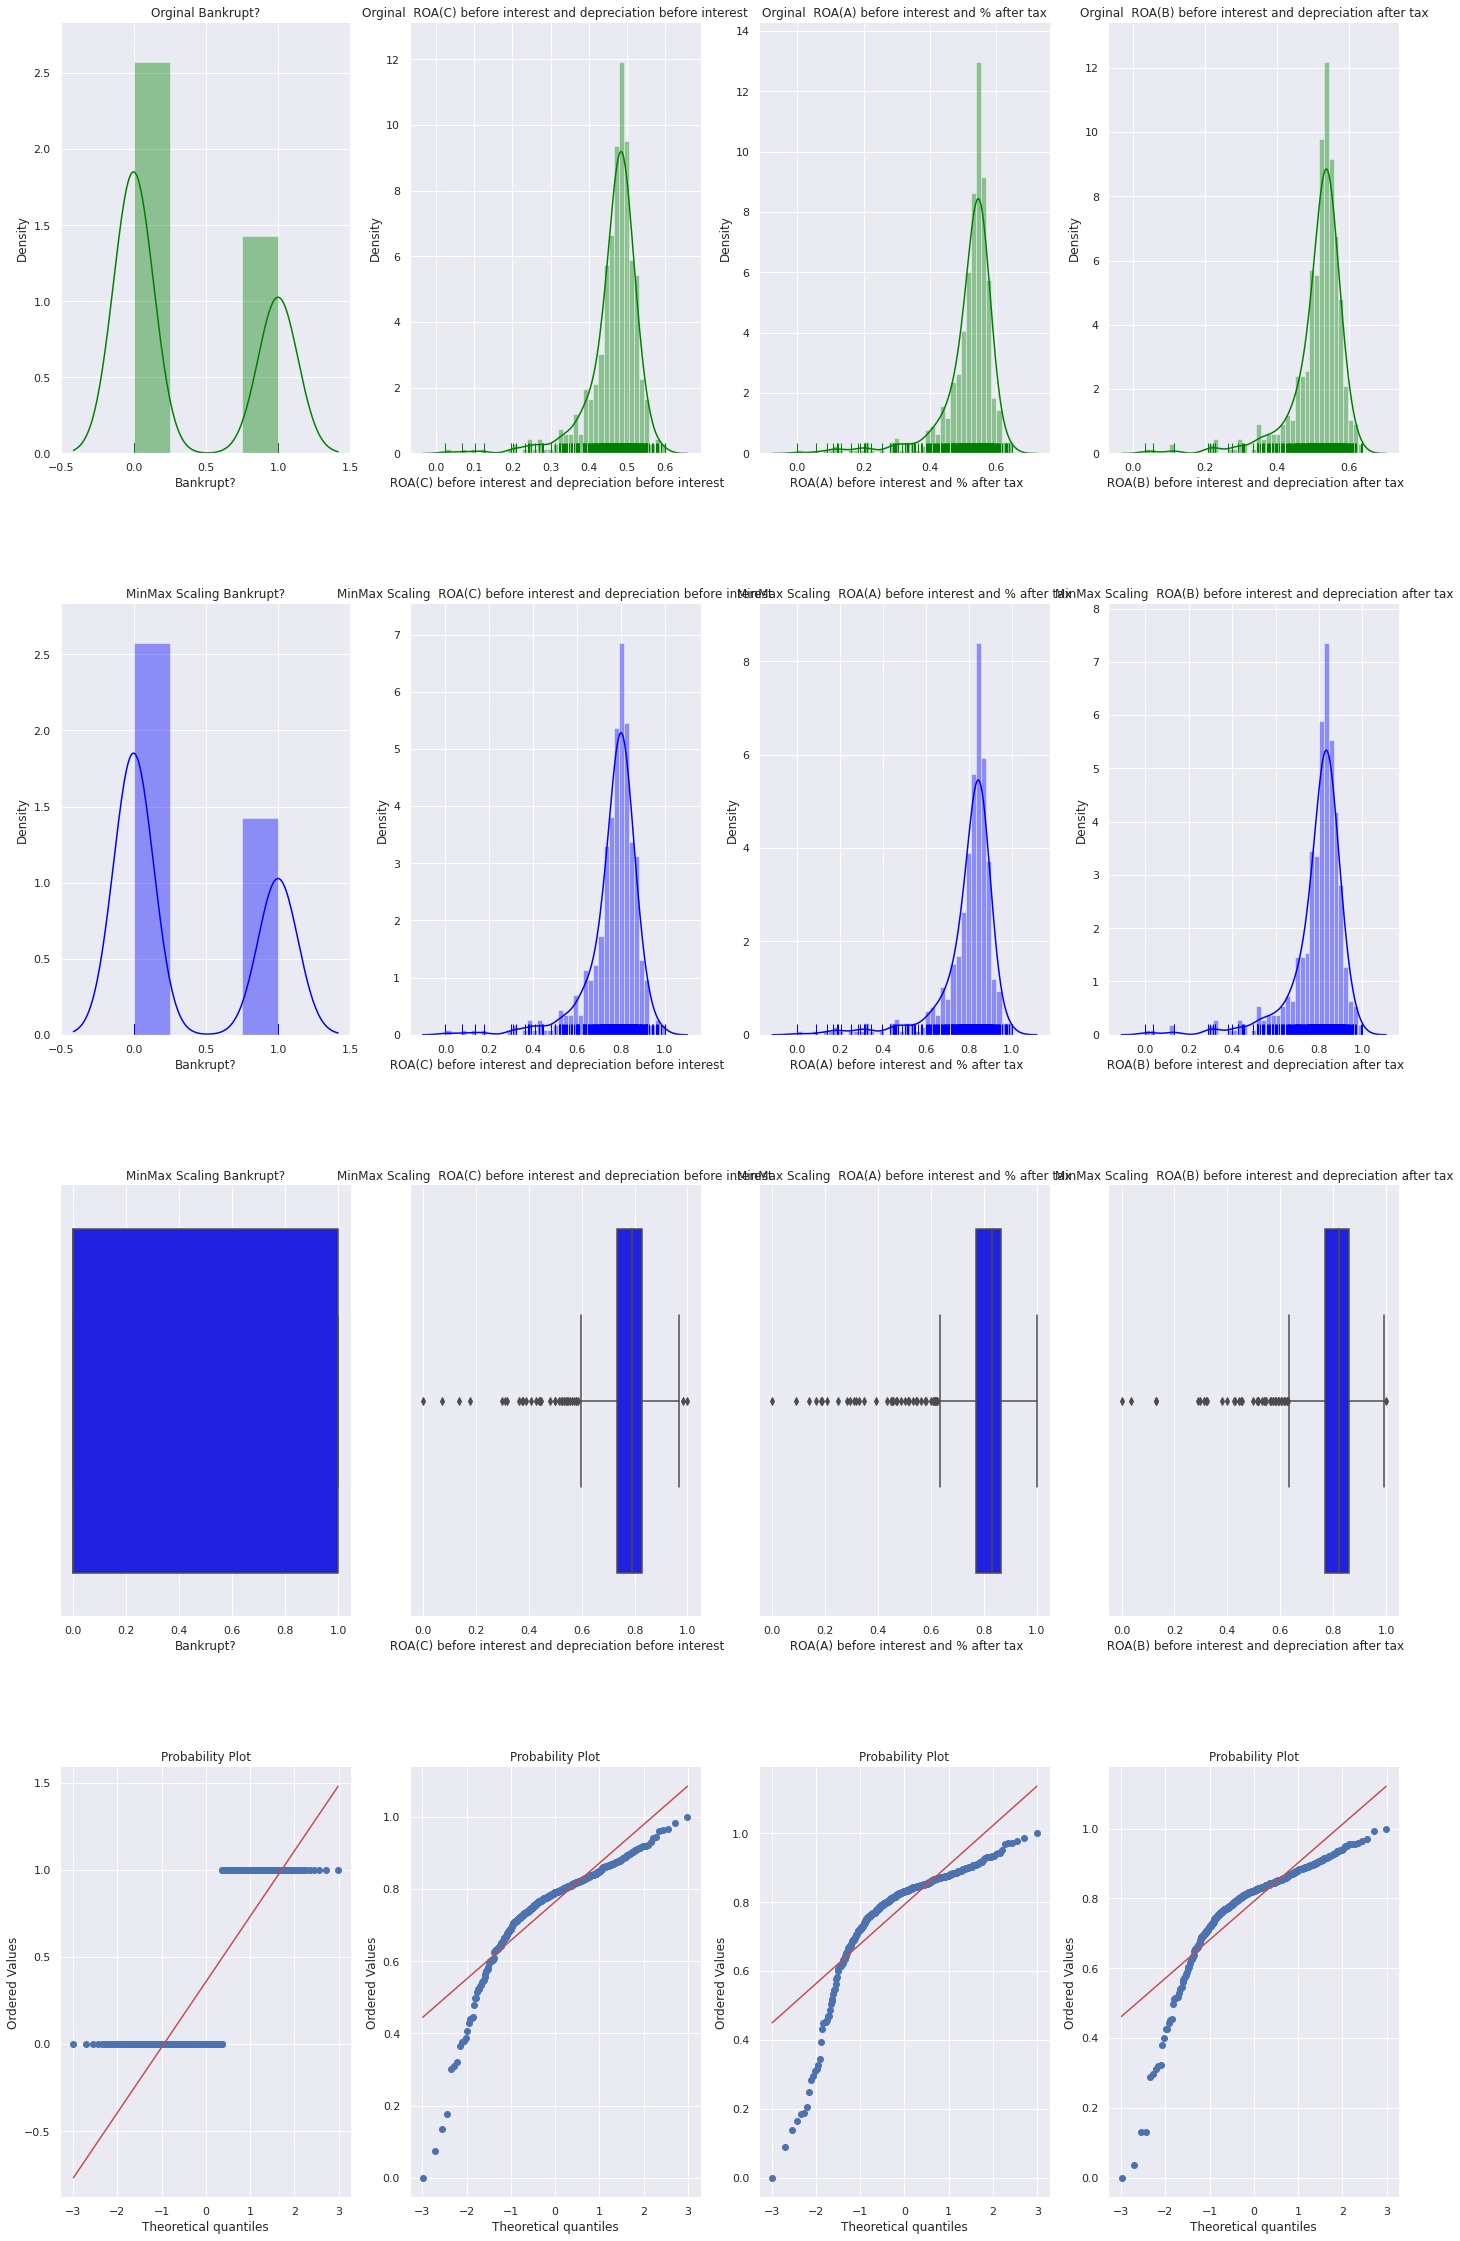

In [31]:
from sklearn.preprocessing import MinMaxScaler
train_y = train_df.copy()
rcParams['figure.figsize'] = 24,40
fig, axes = plt.subplots(4, 4)
sns.set_style("white")
sns.set_palette("bright")
plt.subplots_adjust(hspace=0.35)

scaler = MinMaxScaler()
for i in range(4):
  num_cols = num_fields
  train_y.loc[:,num_cols[i]] = scaler.fit_transform(train_y[[num_cols[i]]])
  sns.distplot(train_df.loc[:,num_cols[i]],ax=axes[0,i],rug=True,color='green')
  axes[0,i].set_title('Orginal '+num_cols[i],fontsize=12)
  sns.distplot(train_y.loc[:,num_cols[i]],ax=axes[1,i],rug=True,color='blue')
  axes[1,i].set_title('MinMax Scaling '+num_cols[i],fontsize=12)
  sns.boxplot(train_y.loc[:,num_cols[i]],ax=axes[2,i],color='blue')
  axes[2,i].set_title('MinMax Scaling '+num_cols[i],fontsize=12)
  stats.probplot(train_y[num_cols[i]],plot = axes[3,i])
  sns.despine()

MinMaxScaler observations:
*   Due to impabalnce in the data, scaling wont't make a difference



## Multicollinearity

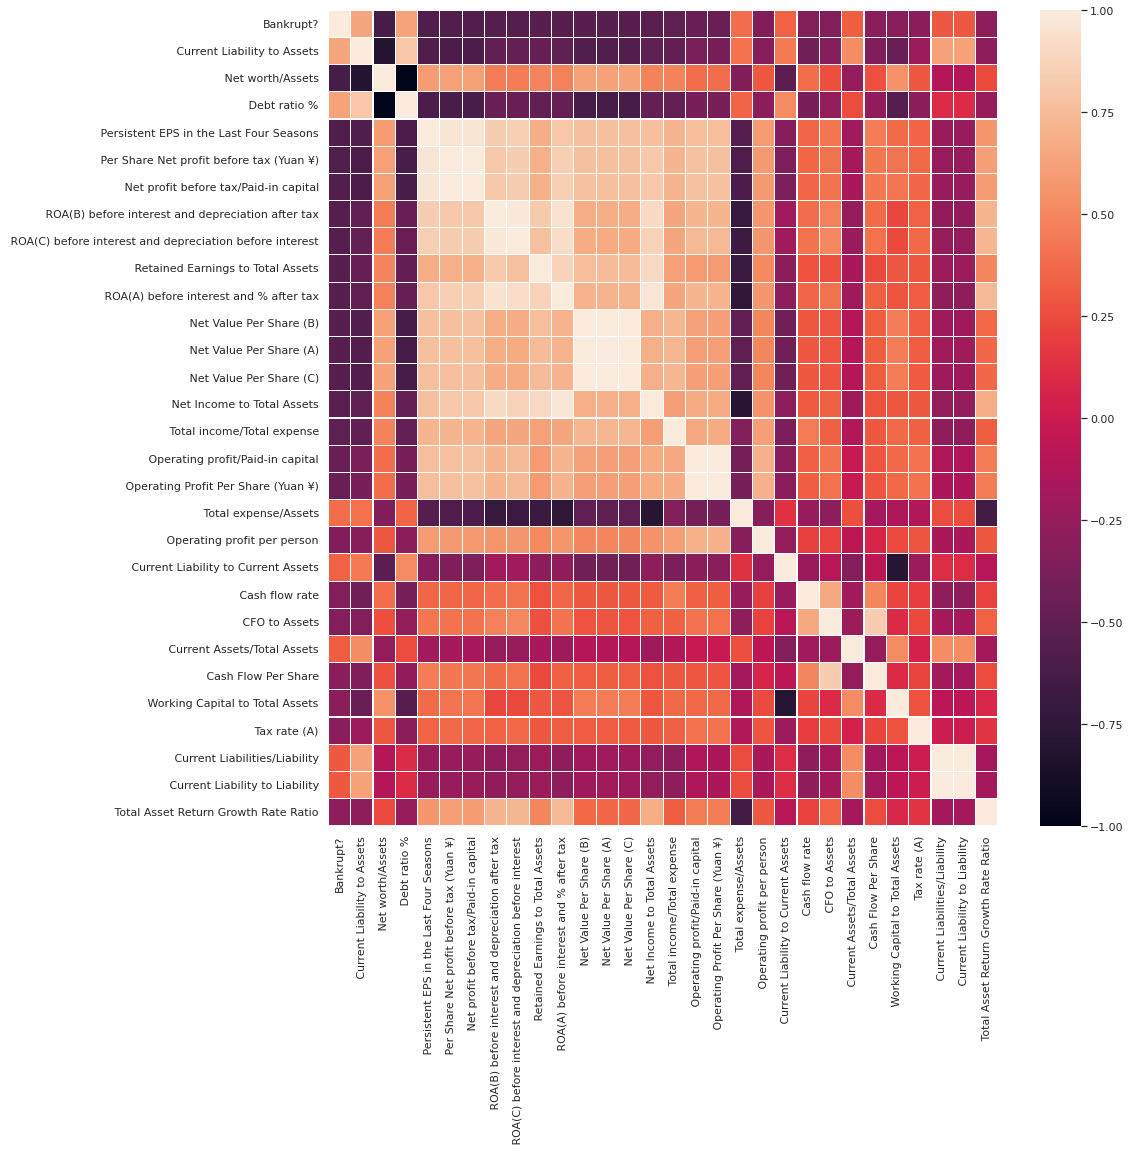

In [32]:
corr = train_df[corr_cols].corr()
fig, ax = plt.subplots(figsize = (15,15))
sns.heatmap(corr, ax = ax, linewidth = 0.1)

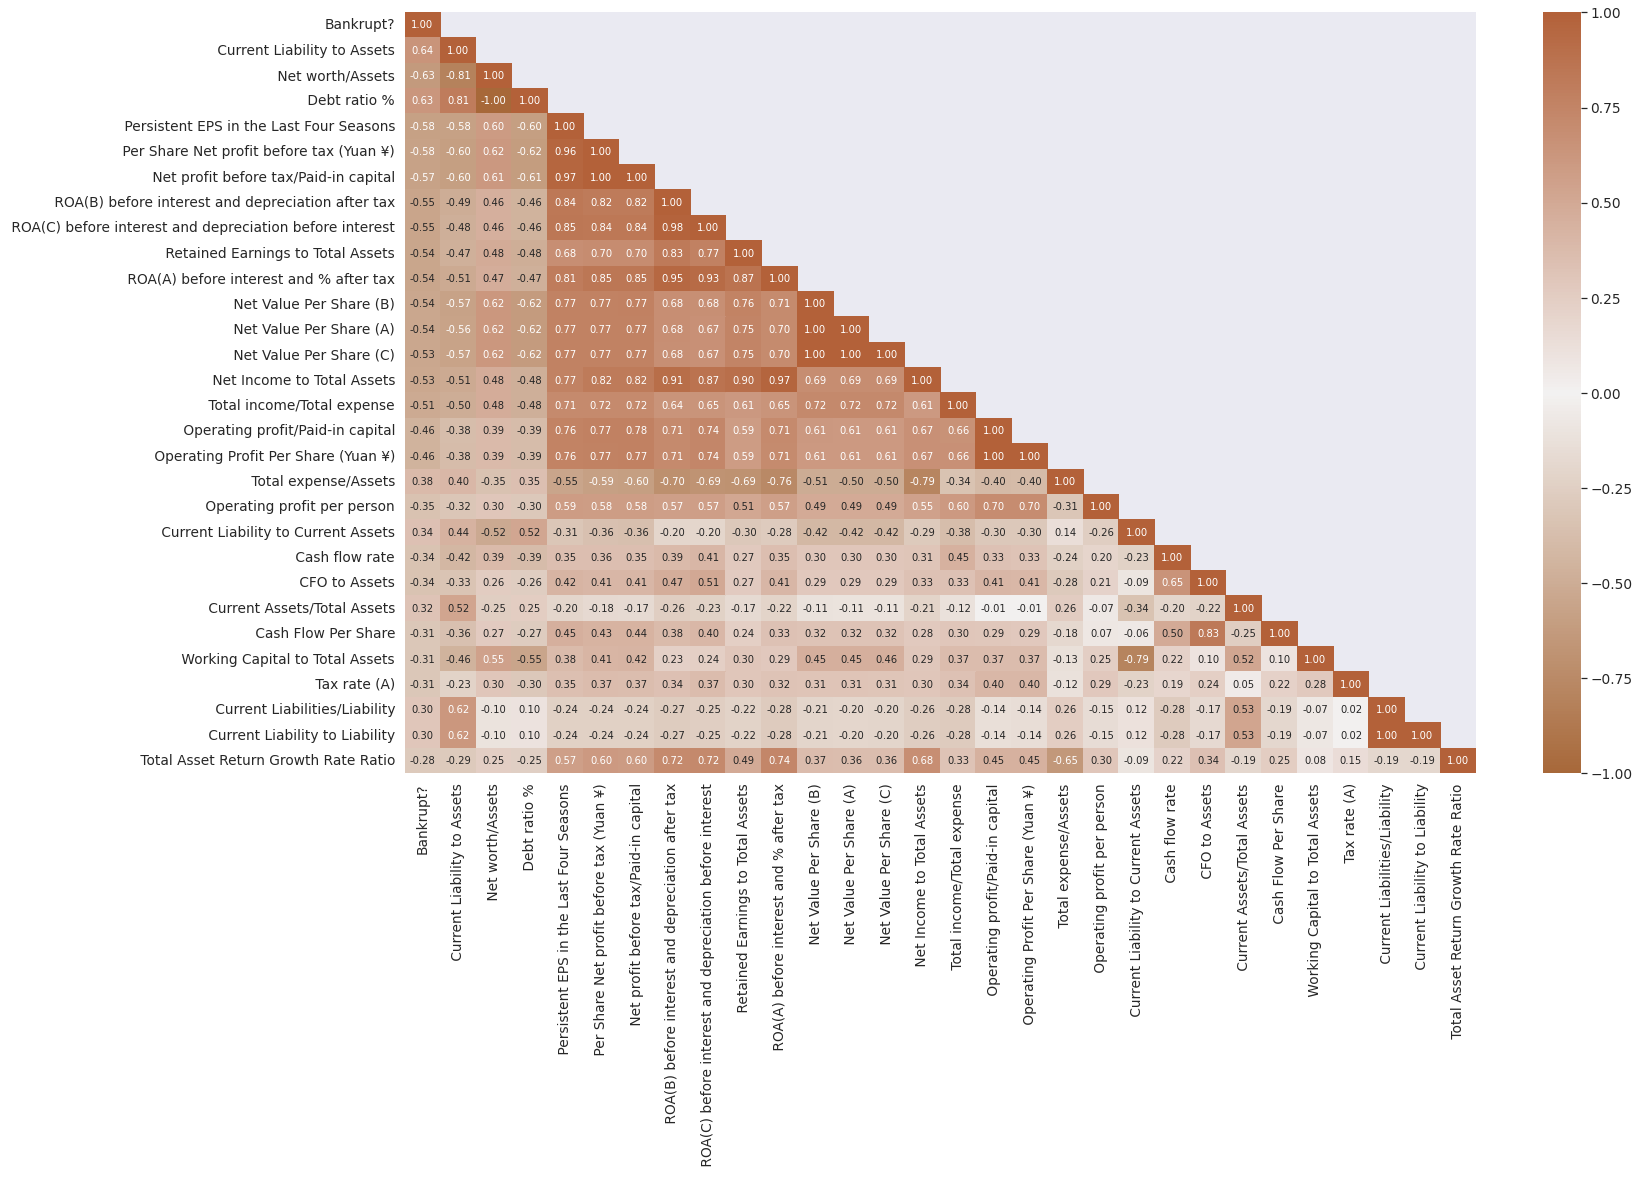

In [33]:
cm = train_df[corr_cols].corr()
#lower trainglular part of the correlation matrix
lt_cm = cm.where(np.tril(np.ones(cm.shape)).astype(np.bool))

sns.set(font_scale=1.25)
fig, ax = plt.subplots(figsize=(24,14))   
cmap = sns.diverging_palette(36, 28, as_cmap=True)

heatmap = sns.heatmap(lt_cm, cbar=True, annot=True, cmap=cmap, fmt='.2f',annot_kws={'size': 10})

As observed from the heatmap, there are features that shows high colinearity. For example - Borrowing dependency has highly correlated with Liability to Equity, Current Liabilitie/Equity and Current Liability to Equity.

For modeling we will remove a few of these variables.

In [34]:
corr_cols

Index(['Bankrupt?', ' Current Liability to Assets', ' Net worth/Assets', ' Debt ratio %', ' Persistent EPS in the Last Four Seasons', ' Per Share Net profit before tax (Yuan ¥)', ' Net profit before tax/Paid-in capital', ' ROA(B) before interest and depreciation after tax', ' ROA(C) before interest and depreciation before interest', ' Retained Earnings to Total Assets', ' ROA(A) before interest and % after tax', ' Net Value Per Share (B)', ' Net Value Per Share (A)', ' Net Value Per Share (C)', ' Net Income to Total Assets', ' Total income/Total expense', ' Operating profit/Paid-in capital', ' Operating Profit Per Share (Yuan ¥)', ' Total expense/Assets', ' Operating profit per person', ' Current Liability to Current Assets', ' Cash flow rate', ' CFO to Assets', ' Current Assets/Total Assets', ' Cash Flow Per Share', ' Working Capital to Total Assets', ' Tax rate (A)', ' Current Liabilities/Liability', ' Current Liability to Liability', ' Total Asset Return Growth Rate Ratio'], dtype='

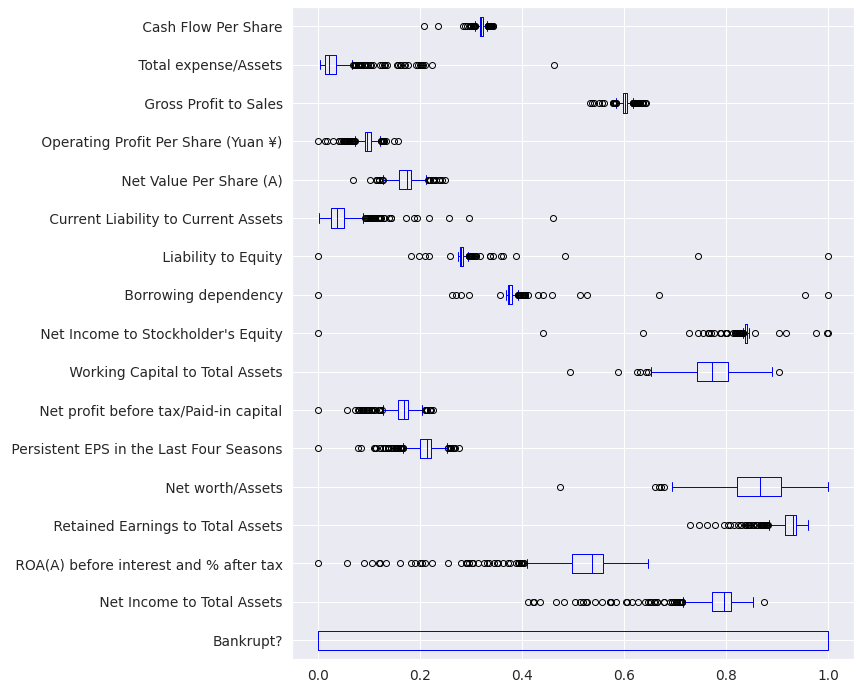

In [35]:
final_col_list = ['Bankrupt?', ' Net Income to Total Assets',' ROA(A) before interest and % after tax',
                  ' Retained Earnings to Total Assets', ' Net worth/Assets', ' Persistent EPS in the Last Four Seasons',
                  ' Net profit before tax/Paid-in capital', ' Working Capital to Total Assets', " Net Income to Stockholder's Equity",
                  ' Borrowing dependency', ' Liability to Equity', ' Current Liability to Current Assets', ' Net Value Per Share (A)', 
                  ' Operating Profit Per Share (Yuan ¥)', ' Gross Profit to Sales', ' Total expense/Assets', 
                  ' Cash Flow Per Share']

train_df[final_col_list].boxplot(vert=False,figsize= (12,12), color = 'blue')
plt.subplots_adjust(left=0.25)
plt.show()

In [36]:
#Checking for multicollinearity for the numeric variables
from statsmodels.stats.outliers_influence import variance_inflation_factor
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = train_df[final_col_list].columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(train_df[final_col_list].values, i)
                          for i in range(len(train_df[final_col_list].columns))]
  
print(vif_data)

                                     feature          VIF
0                                  Bankrupt?     3.217624
1                 Net Income to Total Assets  5118.323670
2     ROA(A) before interest and % after tax  1000.149718
3          Retained Earnings to Total Assets  6816.438817
4                           Net worth/Assets   555.507594
5    Persistent EPS in the Last Four Seasons  1074.279804
6      Net profit before tax/Paid-in capital  1121.089468
7            Working Capital to Total Assets   708.586626
8         Net Income to Stockholder's Equity  1641.095438
9                       Borrowing dependency  1511.898257
10                       Liability to Equity   737.993390
11       Current Liability to Current Assets     7.430892
12                   Net Value Per Share (A)   298.800929
13       Operating Profit Per Share (Yuan ¥)   137.959938
14                     Gross Profit to Sales  4123.041678
15                      Total expense/Assets     6.912110
16            

In [37]:
final_col_list

['Bankrupt?',
 ' Net Income to Total Assets',
 ' ROA(A) before interest and % after tax',
 ' Retained Earnings to Total Assets',
 ' Net worth/Assets',
 ' Persistent EPS in the Last Four Seasons',
 ' Net profit before tax/Paid-in capital',
 ' Working Capital to Total Assets',
 " Net Income to Stockholder's Equity",
 ' Borrowing dependency',
 ' Liability to Equity',
 ' Current Liability to Current Assets',
 ' Net Value Per Share (A)',
 ' Operating Profit Per Share (Yuan ¥)',
 ' Gross Profit to Sales',
 ' Total expense/Assets',
 ' Cash Flow Per Share']

# Regression Modeling

- Build at least three models: an SVM, a logistic regression model, a Naïve Bayes model. Evaluate each of the models’ assumptions. 
- Conduct hyperparameter tuning for the SVM kernel. 
- Evaluate goodness of fit metrics including TPR, FPR, precision, recall, and accuracy on the training and validation sets. 
- Build ROC and Precision / Recall graphs. Evaluate your models' performance on the validation set using the F1-score.  



In [38]:
train_df_model = train_df[final_col_list]

In [39]:
train_df_model.shape
train_df_model.head()

(496, 17)

,Bankrupt?,Net Income to Total Assets,ROA(A) before interest and % after tax,Retained Earnings to Total Assets,Net worth/Assets,Persistent EPS in the Last Four Seasons,Net profit before tax/Paid-in capital,Working Capital to Total Assets,Net Income to Stockholder's Equity,Borrowing dependency,Liability to Equity,Current Liability to Current Assets,Net Value Per Share (A),Operating Profit Per Share (Yuan ¥),Gross Profit to Sales,Total expense/Assets,Cash Flow Per Share
870,1,0.795422,0.535543,0.930257,0.807812,0.213955,0.169195,0.803591,0.839972,0.380906,0.286978,0.036623,0.169399,0.100236,0.599307,0.010456,0.304025
4918,1,0.420995,0.106629,0.808267,0.756296,0.132268,0.106636,0.753911,0.744086,0.401447,0.304944,0.047624,0.131052,0.060500,0.593973,0.223712,0.316050
24,0,0.803445,0.561382,0.933884,0.805484,0.221897,0.177309,0.745811,0.841047,0.388058,0.287406,0.050171,0.172896,0.113834,0.602952,0.028846,0.328252
2148,1,0.778222,0.504416,0.919510,0.793875,0.193060,0.153804,0.776888,0.837361,0.390562,0.289852,0.042234,0.175972,0.087941,0.616750,0.013941,0.313079
5313,1,0.751652,0.466529,0.900281,0.792424,0.185024,0.147772,0.723887,0.833238,0.383343,0.290198,0.057896,0.155240,0.082404,0.595282,0.031936,0.321285


In [40]:
final_test_list = final_col_list.copy()
#final_test_list.remove('Bankrupt?')
test_df = test_df.drop_duplicates()
test_df.shape
test_df_model = test_df[final_test_list]
test_df_model.shape
test_df_final = test_df_model.drop('Bankrupt?', axis=1)

(124, 96)

(124, 17)

In [41]:

test_df_model.shape
test_df_model.head()

(124, 17)

,Bankrupt?,Net Income to Total Assets,ROA(A) before interest and % after tax,Retained Earnings to Total Assets,Net worth/Assets,Persistent EPS in the Last Four Seasons,Net profit before tax/Paid-in capital,Working Capital to Total Assets,Net Income to Stockholder's Equity,Borrowing dependency,Liability to Equity,Current Liability to Current Assets,Net Value Per Share (A),Operating Profit Per Share (Yuan ¥),Gross Profit to Sales,Total expense/Assets,Cash Flow Per Share
2026,1,0.748514,0.463966,0.915840,0.785561,0.163657,0.116997,0.768030,0.832155,0.390024,0.292023,0.044448,0.167545,0.077762,0.598815,0.068681,0.296845
402,0,0.813984,0.564762,0.941180,0.902682,0.225584,0.178441,0.759189,0.841288,0.373208,0.278035,0.043580,0.182040,0.105610,0.600065,0.009306,0.322452
108,0,0.825519,0.591420,0.943072,0.868338,0.252435,0.194329,0.760386,0.842508,0.376747,0.280094,0.040103,0.226244,0.110333,0.606116,0.013677,0.330905
330,0,0.844730,0.622111,0.948545,0.882214,0.249976,0.204932,0.806414,0.843798,0.375749,0.279169,0.019215,0.187392,0.133132,0.628664,0.020476,0.336953
1176,1,0.769694,0.498092,0.923034,0.826919,0.193533,0.153299,0.778467,0.837122,0.384412,0.284086,0.038878,0.172348,0.091116,0.595002,0.018102,0.318809


In [42]:
#train_df.info()
X = train_df_model.drop(['Bankrupt?'], axis = 1)
y = train_df_model['Bankrupt?']

In [43]:
# Compare training and validation data set columns
X.shape
y.shape

(496, 16)

(496,)

In [44]:
test_df_model.shape

Xt = test_df_model.drop(['Bankrupt?'], axis = 1)
yt = test_df_model['Bankrupt?']
Xt.shape
yt.shape

(124, 17)

(124, 16)

(124,)

###SMOTE 
(Synthetic Minority Oversampling Technique) techniques to deal with imbalanced data 

In [45]:
oversample = SMOTE()
X,y=oversample.fit_resample(X,y)


## Scaling (RobustScaler) before regression




In [46]:
scaler=RobustScaler()

X_final=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
test_final=pd.DataFrame(scaler.fit_transform(test_df_final),columns=X.columns)


## Feature Selection

In [47]:
clf = RandomForestClassifier(n_estimators=10)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_final, y)

RandomForestClassifier(n_estimators=10)

<Figure size 720x432 with 0 Axes>

Text(0.5, 0, 'Feature Importance Score')

Text(0, 0.5, 'Features')

Text(0.5, 1.0, 'Visualizing Important Features')

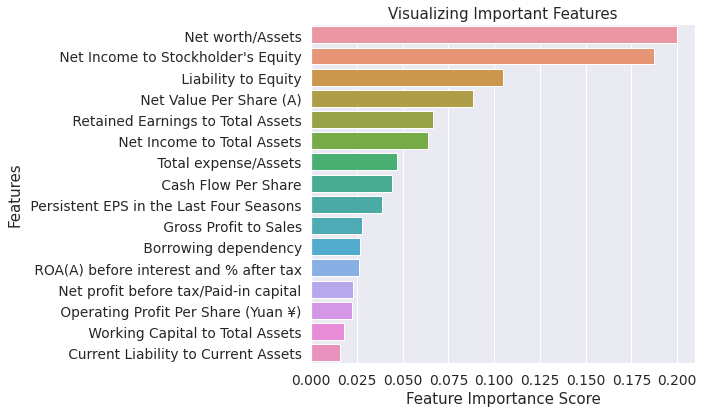

In [48]:
feature_imp = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)

#print("Accuracy: {}".format(metrics.accuracy_score(y_test, y_pred)))

plt.figure(figsize=(10,6))
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.tight_layout()

## Train Test Split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [50]:
X_final.shape
X_final.head()
test_final.shape
test_final.head()

(638, 16)

,Net Income to Total Assets,ROA(A) before interest and % after tax,Retained Earnings to Total Assets,Net worth/Assets,Persistent EPS in the Last Four Seasons,Net profit before tax/Paid-in capital,Working Capital to Total Assets,Net Income to Stockholder's Equity,Borrowing dependency,Liability to Equity,Current Liability to Current Assets,Net Value Per Share (A),Operating Profit Per Share (Yuan ¥),Gross Profit to Sales,Total expense/Assets,Cash Flow Per Share
0,0.062848,0.072641,0.060834,-0.503395,0.107589,0.079861,0.532659,0.028706,0.417866,0.708575,-0.123050,-0.111392,0.358512,-0.150035,-0.617059,-2.184502
1,-8.988054,-6.367807,-4.806936,-1.073352,-3.212296,-2.858185,-0.224004,-20.845312,2.432900,2.870897,0.267655,-1.647257,-2.723822,-0.729952,9.044236,-0.511685
2,0.256787,0.460640,0.205544,-0.529150,0.430355,0.460929,-0.347363,0.262766,1.119458,0.760137,0.358091,0.028692,1.413327,0.246246,0.216109,1.185732
3,-0.352917,-0.394758,-0.368002,-0.657591,-0.741595,-0.642963,0.125950,-0.539605,1.365098,1.054480,0.076206,0.151899,-0.595243,1.746579,-0.459176,-0.924969
4,-0.995171,-0.963659,-1.135302,-0.673646,-1.068204,-0.926285,-0.681282,-1.437218,0.656923,1.096221,0.632480,-0.678481,-1.024749,-0.587646,0.356098,0.216482


(124, 16)

,Net Income to Total Assets,ROA(A) before interest and % after tax,Retained Earnings to Total Assets,Net worth/Assets,Persistent EPS in the Last Four Seasons,Net profit before tax/Paid-in capital,Working Capital to Total Assets,Net Income to Stockholder's Equity,Borrowing dependency,Liability to Equity,Current Liability to Current Assets,Net Value Per Share (A),Operating Profit Per Share (Yuan ¥),Gross Profit to Sales,Total expense/Assets,Cash Flow Per Share
0,-1.864296,-1.919775,-1.055936,-1.165093,-3.359873,-3.514845,-0.038056,-3.446578,1.580978,2.042675,0.189241,-0.552171,-1.879760,-0.253199,2.513659,-4.521441
1,0.690953,0.682618,0.687880,0.516878,0.812102,0.602906,-0.185281,0.523808,-0.362097,-0.377361,0.161147,0.339598,0.861723,-0.097330,-0.454206,0.445969
2,1.141129,1.370866,0.818091,0.023662,2.621019,1.667720,-0.165348,1.054397,0.046781,-0.021132,0.048519,3.058976,1.326653,0.656968,-0.235760,2.085763
3,1.890927,2.163265,1.194755,0.222946,2.455414,2.378269,0.601111,1.615207,-0.068491,-0.181258,-0.627973,0.668827,3.571142,3.467984,0.104100,3.259005
4,-1.037636,-1.038705,-0.560896,-0.571149,-1.347134,-1.081996,0.135741,-1.287212,0.932511,0.669499,0.008849,-0.256643,-0.565130,-0.728501,-0.014552,-0.260720


Even though we have train and test dataset, we will start with splitting the training dataset and then predict finally using test.csv

 - X_train: the subset of our features used for training
 - X_test: the subset which will be our ‘hold-out’ set – what we’ll use to test the model
 - y_train: the target variable SalePrice which corresponds to X_train
 - y_test: the target variable SalePrice which corresponds to X_test





## Logistic Regression 

In [51]:
#fit the model on training dataset
#Fitting the model on the train dataset 
logmodel = LogisticRegression().fit(X_train,y_train)

Text(0.5, 1.05, 'Confusion Matrix for Logistic Regression')

Text(12.5, 0.5, 'Predicted Bankruptcy')

Text(0.5, 12.5, 'Actual Bankruptcy')


The accuracy of the Logistic Regression is 84.38
Precision : 87.72
Recall  : 79.37
F1 Score : 83.33


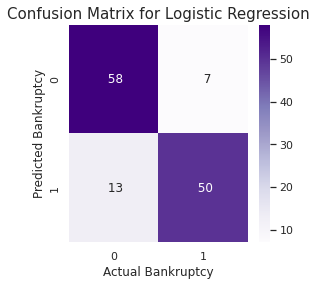

In [52]:
y_hat_test = logmodel.predict(X_test)
cm = confusion_matrix(y_test, y_hat_test)
#visualize confusion matrix 
sns.set(rc = {'figure.figsize':(4,4)})

sns.heatmap(confusion_matrix(y_test, y_hat_test),annot=True,fmt='3.0f',cmap="Purples")

plt.title('Confusion Matrix for Logistic Regression', y=1.05, size=15)
plt.ylabel('Predicted Bankruptcy')
plt.xlabel('Actual Bankruptcy')
acc_log_reg = round(accuracy_score(y_hat_test,y_test)*100,2)
print('\nThe accuracy of the Logistic Regression is',acc_log_reg)
print("Precision :", round((precision_score(y_test, y_hat_test))*100,2))
print("Recall  :",round((recall_score(y_test, y_hat_test))*100,2))
print("F1 Score :",round((f1_score(y_test, y_hat_test))*100,2))

Validate the model with unseen test set

In [53]:
# model validation with test data
test_df_model.shape
test_log_reg_pred= logmodel.predict(Xt)
print(test_log_reg_pred)

(124, 17)

[1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0
 1 0 0 0 1 1 1 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0
 0 0 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 0 1]


<Figure size 1008x504 with 0 Axes>

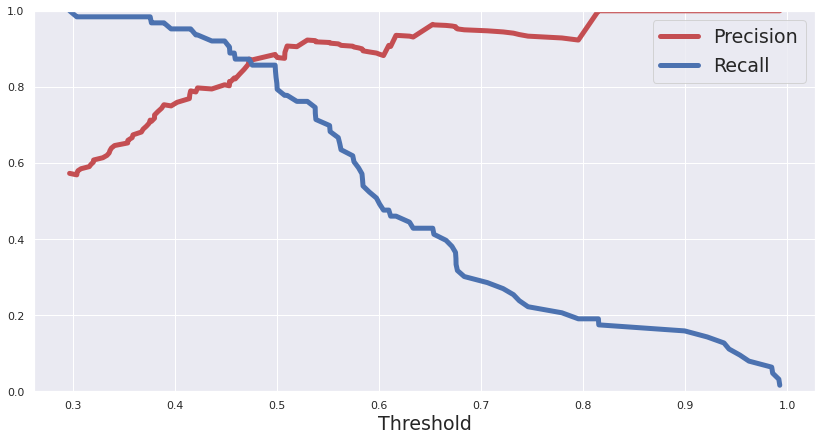

In [54]:

# getting the probabilities of our predictions

y_scores = logmodel.predict_proba(X_test)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(y_test, y_scores)
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="Precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="Recall", linewidth=5)
    plt.xlabel("Threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

<Figure size 720x720 with 0 Axes>

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')


Logistic Regression ROC AUC : 0.9257631257631257


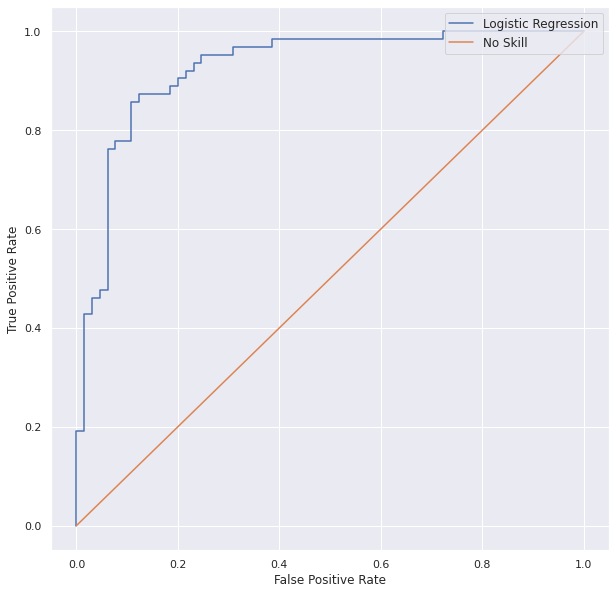

In [55]:
lr_auc = roc_auc_score(y_test,y_scores)
ns_prob = [0 for _ in range(len(y_test))]
ns_auc = roc_auc_score(y_test,ns_prob)

lr_fpr, lr_tpr ,_ = roc_curve(y_test,y_scores )
ns_fpr, ns_tpr ,_ = roc_curve(y_test,ns_prob )

plt.figure(figsize=(10, 10))
plt.plot(lr_fpr, lr_tpr, label = 'Logistic Regression')
plt.plot(ns_fpr, ns_tpr, label = 'No Skill')

plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.legend(loc="upper right", fontsize=12)

print("\nLogistic Regression ROC AUC :",lr_auc)

In [56]:
scoring = {'Accuracy': 'accuracy', 'Log_loss': 'neg_log_loss', 'AUC': 'roc_auc','Precision': 'precision', 'Recall': 'recall','F1 Score':'f1'}

min_max_scaler = preprocessing.MinMaxScaler()
X_1 = min_max_scaler.fit_transform(X)
#y_1 = min_max_scaler.fit_transform(y)


X_2 = min_max_scaler.transform(X_1)
results = cross_validate(logmodel, X, y, cv=5, scoring=list(scoring.values()), 
                         return_train_score=False)

print('K-fold cross-validation results:')
for sc in range(len(scoring)):
    print(logmodel.__class__.__name__+" average %s: %.3f (+/-%.3f)" % (list(scoring.keys())[sc], -results['test_%s' % list(scoring.values())[sc]].mean()
                               if list(scoring.values())[sc]=='neg_log_loss' 
                               else results['test_%s' % list(scoring.values())[sc]].mean(), 
                               results['test_%s' % list(scoring.values())[sc]].std()))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


K-fold cross-validation results:
LogisticRegression average Accuracy: 0.837 (+/-0.032)
LogisticRegression average Log_loss: 0.477 (+/-0.016)
LogisticRegression average AUC: 0.931 (+/-0.018)
LogisticRegression average Precision: 0.900 (+/-0.032)
LogisticRegression average Recall: 0.759 (+/-0.044)
LogisticRegression average F1 Score: 0.823 (+/-0.037)


## Naive Bayes

In [57]:
#fit the model on training dataset
#Fitting the model on the train dataset 
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train)#.predict(X_test)

Text(0.5, 1.05, 'Confusion Matrix for Naive Bayes Regression')

Text(12.5, 0.5, 'Predicted Bankruptcy')

Text(0.5, 12.5, 'Actual Bankruptcy')


The accuracy of the Naive Bayes Regression is 80.47
Precision : 91.3
Recall  : 66.67
F1 Score : 77.06


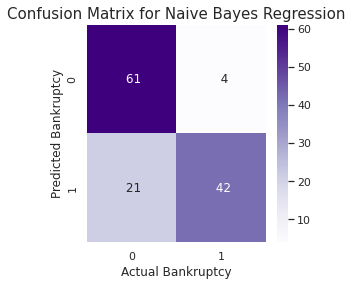

In [58]:
y_hat_test = gnb.predict(X_test)
cm = confusion_matrix(y_test, y_hat_test)
#visualize confusion matrix 
sns.heatmap(confusion_matrix(y_test, y_hat_test),annot=True,fmt='3.0f',cmap="Purples")
plt.title('Confusion Matrix for Naive Bayes Regression', y=1.05, size=15)
plt.ylabel('Predicted Bankruptcy')
plt.xlabel('Actual Bankruptcy')
acc_log_reg = round(accuracy_score(y_hat_test,y_test)*100,2)
print('\nThe accuracy of the Naive Bayes Regression is',acc_log_reg)
print("Precision :", round((precision_score(y_test, y_hat_test))*100,2))
print("Recall  :",round((recall_score(y_test, y_hat_test))*100,2))
print("F1 Score :",round((f1_score(y_test, y_hat_test))*100,2))

Validate the model with unseen test set

In [59]:
# model validation with test data
test_df_model.shape
test_log_gnb_pred= gnb.predict(Xt)
print(test_log_gnb_pred)

(124, 17)

[1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0
 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0]


<Figure size 1008x504 with 0 Axes>

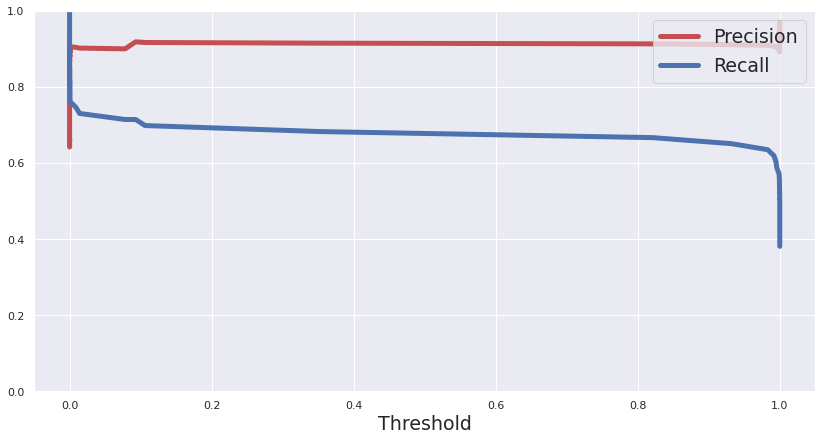

In [60]:

# getting the probabilities of our predictions

y_scores = gnb.predict_proba(X_test)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(y_test, y_scores)
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="Precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="Recall", linewidth=5)
    plt.xlabel("Threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

<Figure size 720x720 with 0 Axes>

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')


Naive Bayes ROC AUC : 0.9201465201465202


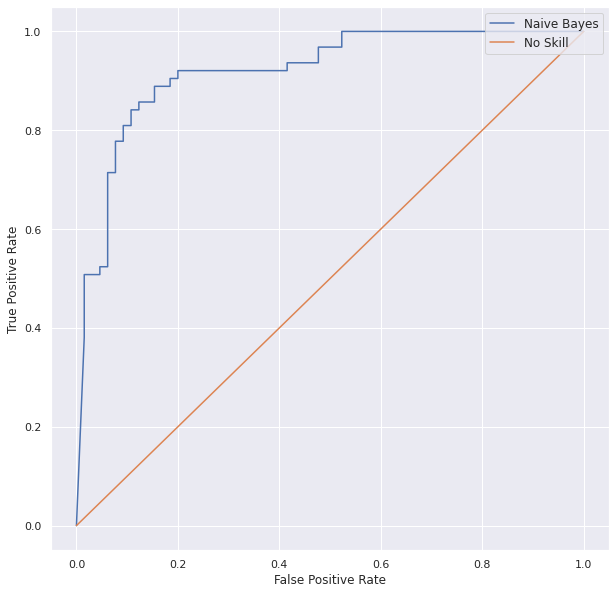

In [61]:
lr_auc = roc_auc_score(y_test,y_scores)
ns_prob = [0 for _ in range(len(y_test))]
ns_auc = roc_auc_score(y_test,ns_prob)

lr_fpr, lr_tpr ,_ = roc_curve(y_test,y_scores )
ns_fpr, ns_tpr ,_ = roc_curve(y_test,ns_prob )

plt.figure(figsize=(10, 10))
plt.plot(lr_fpr, lr_tpr, label = 'Naive Bayes')
plt.plot(ns_fpr, ns_tpr, label = 'No Skill')

plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.legend(loc="upper right", fontsize=12)

print("\nNaive Bayes ROC AUC :",lr_auc)

In [62]:
scoring = {'Accuracy': 'accuracy', 'Log_loss': 'neg_log_loss', 'AUC': 'roc_auc','Precision': 'precision', 'Recall': 'recall','F1 Score':'f1'}

min_max_scaler = preprocessing.MinMaxScaler()
X_1 = min_max_scaler.fit_transform(X)
#y_1 = min_max_scaler.fit_transform(y)


X_2 = min_max_scaler.transform(X_1)
results = cross_validate(gnb, X, y, cv=5, scoring=list(scoring.values()), 
                         return_train_score=False)

print('K-fold cross-validation results:')
for sc in range(len(scoring)):
    print(gnb.__class__.__name__+" average %s: %.3f (+/-%.3f)" % (list(scoring.keys())[sc], -results['test_%s' % list(scoring.values())[sc]].mean()
                               if list(scoring.values())[sc]=='neg_log_loss' 
                               else results['test_%s' % list(scoring.values())[sc]].mean(), 
                               results['test_%s' % list(scoring.values())[sc]].std()))

K-fold cross-validation results:
GaussianNB average Accuracy: 0.785 (+/-0.026)
GaussianNB average Log_loss: 2.523 (+/-0.516)
GaussianNB average AUC: 0.919 (+/-0.030)
GaussianNB average Precision: 0.919 (+/-0.051)
GaussianNB average Recall: 0.627 (+/-0.028)
GaussianNB average F1 Score: 0.745 (+/-0.030)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


## SVM

In [63]:
#fit the model on training dataset
#Fitting the model on the train dataset 
svm = SVC(probability=True, kernel='linear', C=1, gamma=1)
#model = SVC(kernel='linear', c=1, gamma=1)
y_pred = svm.fit(X_train, y_train)#.predict(X_test)

Text(0.5, 1.05, 'Confusion Matrix for SVM Regression')

Text(12.5, 0.5, 'Predicted Bankruptcy')

Text(0.5, 12.5, 'Actual Bankruptcy')


The accuracy of the SVM Regression is 85.94
Precision : 88.14
Recall  : 82.54
F1 Score : 85.25


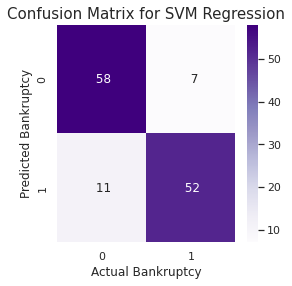

In [64]:
y_hat_test = svm.predict(X_test)
cm = confusion_matrix(y_test, y_hat_test)
#visualize confusion matrix 
sns.heatmap(confusion_matrix(y_test, y_hat_test),annot=True,fmt='3.0f',cmap="Purples")
plt.title('Confusion Matrix for SVM Regression', y=1.05, size=15)
plt.ylabel('Predicted Bankruptcy')
plt.xlabel('Actual Bankruptcy')
acc_log_reg = round(accuracy_score(y_hat_test,y_test)*100,2)
print('\nThe accuracy of the SVM Regression is',acc_log_reg)
print("Precision :", round((precision_score(y_test, y_hat_test))*100,2))
print("Recall  :",round((recall_score(y_test, y_hat_test))*100,2))
print("F1 Score :",round((f1_score(y_test, y_hat_test))*100,2))

In [65]:
# model validation with test data
test_df_model.shape
test_log_svm_pred= svm.predict(Xt)
print(test_log_svm_pred)

(124, 17)

[1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0
 1 0 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 0 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 0 1]


<Figure size 1008x504 with 0 Axes>

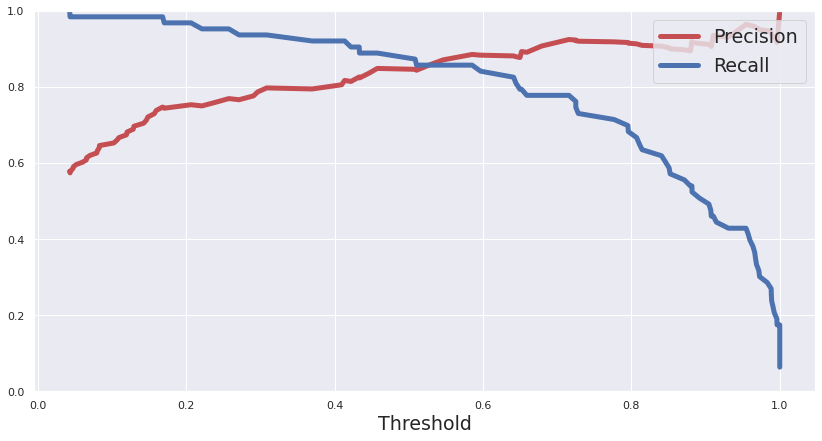

In [66]:

# getting the probabilities of our predictions

y_scores = svm.predict_proba(X_test)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(y_test, y_scores)
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="Precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="Recall", linewidth=5)
    plt.xlabel("Threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])
    #plt.xlim([0, 1])

plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

<Figure size 720x720 with 0 Axes>

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

\SVM ROC AUC : 0.9282051282051281


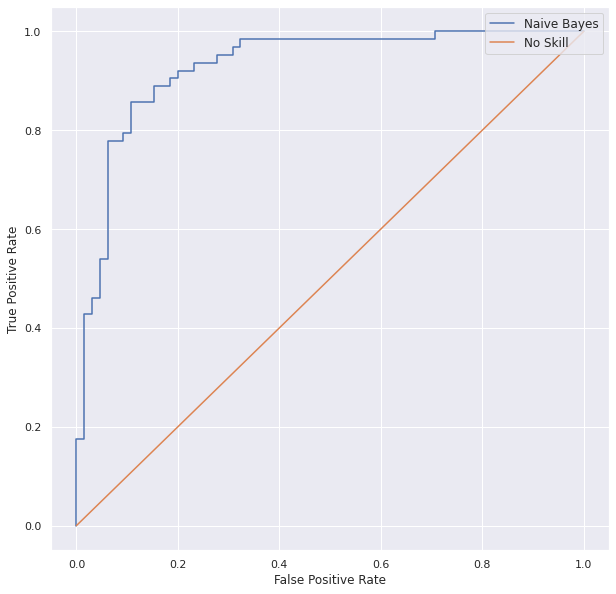

In [67]:
lr_auc = roc_auc_score(y_test,y_scores)
ns_prob = [0 for _ in range(len(y_test))]
ns_auc = roc_auc_score(y_test,ns_prob)

lr_fpr, lr_tpr ,_ = roc_curve(y_test,y_scores )
ns_fpr, ns_tpr ,_ = roc_curve(y_test,ns_prob )

plt.figure(figsize=(10, 10))
plt.plot(lr_fpr, lr_tpr, label = 'Naive Bayes')
plt.plot(ns_fpr, ns_tpr, label = 'No Skill')

plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.legend(loc="upper right", fontsize=12)

print("\SVM ROC AUC :",lr_auc)

In [68]:
scoring = {'Accuracy': 'accuracy', 'Log_loss': 'neg_log_loss', 'AUC': 'roc_auc',
           'Precision': 'precision', 'Recall': 'recall','F1 Score':'f1'}

min_max_scaler = preprocessing.MinMaxScaler()
X_1 = min_max_scaler.fit_transform(X)
#y_1 = min_max_scaler.fit_transform(y)


X_2 = min_max_scaler.transform(X_1)
results = cross_validate(svm, X, y, cv=40, scoring=list(scoring.values()), 
                         return_train_score=False)

print('K-fold cross-validation results:')
for sc in range(len(scoring)):
    print(svm.__class__.__name__+" average %s: %.3f (+/-%.3f)" % (list(scoring.keys())[sc], 
                                                                  -results['test_%s' % list(scoring.values())[sc]].mean()
                               if list(scoring.values())[sc]=='neg_log_loss' 
                               else results['test_%s' % list(scoring.values())[sc]].mean(), 
                               results['test_%s' % list(scoring.values())[sc]].std()))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


K-fold cross-validation results:
SVC average Accuracy: 0.857 (+/-0.085)
SVC average Log_loss: 0.331 (+/-0.154)
SVC average AUC: 0.939 (+/-0.060)
SVC average Precision: 0.907 (+/-0.096)
SVC average Recall: 0.803 (+/-0.121)
SVC average F1 Score: 0.846 (+/-0.094)


##Random Forest Classifier

In [69]:
%%time
rf1 = RandomForestClassifier()
#(n_estimators = 60, criterion = 'entropy',random_state = 0)

# define gridsearch parameters
param_grid = {'criterion': ['entropy'],
              'n_estimators': [50],
              'max_features': ['auto', 'log2'],
              'max_depth': [3, 5, 7],
              'min_samples_split': [8, 10, 12],
              'min_samples_leaf': [8, 10, 12]}

# instantiate gridsearchcv class
rf = GridSearchCV(estimator=rf1,
                    param_grid=param_grid,
                    cv=5,
                    verbose=3,
                    n_jobs=-1)


rf_fit = rf.fit(X_train,y_train)

# Get the estimator
best_rf = rf_fit.best_estimator_
best_rf

Fitting 5 folds for each of 54 candidates, totalling 270 fits
CPU times: user 1.47 s, sys: 92.4 ms, total: 1.56 s
Wall time: 11.7 s


In [70]:
# Make predictions using the unoptimized and model
predictions = (rf1.fit(X_train, y_train)).predict(X_test)
best_predictions = best_rf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

Unoptimized model
------
Accuracy score on testing data: 0.8828
F-score on testing data: 0.8777

Optimized Model
------
Final accuracy score on the testing data: 0.8750
Final F-score on the testing data: 0.8730


[[58  7]
 [11 52]]


Text(0.5, 1.05, 'Confusion Matrix for Random Forest Classification')

Text(12.5, 0.5, 'Predicted bankruptcy')

Text(0.5, 12.5, 'Actual bankruptcy')

accuracy score =  0.875
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        65
           1       0.87      0.87      0.87        63

    accuracy                           0.88       128
   macro avg       0.87      0.87      0.87       128
weighted avg       0.88      0.88      0.88       128

F1 Score : 87.3


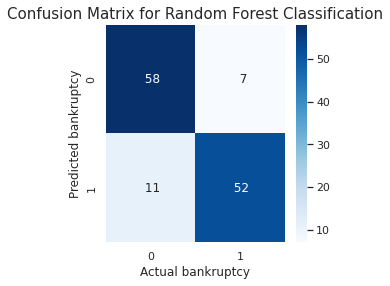

In [71]:
#getting confusion matrix
#y_pred = rf.predict(X_test)
y_hat_rf = best_rf.predict(X_test)
#cm = confusion_matrix(yt,y_hat_rf)
print(cm)
cm = confusion_matrix(y_test,y_hat_rf)
#visualize confusion matrix 
sns.heatmap(confusion_matrix(y_test, y_hat_test),annot=True,fmt='3.0f',cmap="Blues")
plt.title('Confusion Matrix for Random Forest Classification', y=1.05, size=15)
plt.ylabel('Predicted bankruptcy')
plt.xlabel('Actual bankruptcy')

#checking accuracy
rfa = accuracy_score(y_test,y_hat_rf)
print('accuracy score = ',accuracy_score(y_test,y_hat_rf))
print(classification_report(y_test,y_hat_rf))
print("F1 Score :",round((f1_score(y_test, y_hat_rf))*100,2))


In [72]:
#K-fold cross validation
kfold = model_selection.KFold(n_splits=10)
model_kfold = RandomForestClassifier()
results_kfold = model_selection.cross_val_score(model_kfold, X, y, cv=kfold)
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0)) 

Accuracy: 90.44%


In [73]:
# Stratified K-fold Cross-Validation

skfold = StratifiedKFold(n_splits=3)
model_skfold = RandomForestClassifier()
results_skfold = model_selection.cross_val_score(model_skfold, X, y, cv=skfold)
print("Accuracy: %.2f%%" % (results_skfold.mean()*100.0))

Accuracy: 90.75%


In [74]:
# # Leave One Out Cross-Validation (LOOCV)

# loocv = model_selection.LeaveOneOut()
# model_loocv = RandomForestClassifier()
# results_loocv = model_selection.cross_val_score(model_loocv, X, y, cv=loocv)
# print("Accuracy: %.2f%%" % (results_loocv.mean()*100.0))

### RandomForest Validation

In [75]:
test_df_model.shape

Xt = test_df_model.drop(['Bankrupt?'], axis = 1)
yt = test_df_model['Bankrupt?']
Xt.shape
yt.shape

(124, 17)

(124, 16)

(124,)

In [76]:
Xt.head()
yt.head()

,Net Income to Total Assets,ROA(A) before interest and % after tax,Retained Earnings to Total Assets,Net worth/Assets,Persistent EPS in the Last Four Seasons,Net profit before tax/Paid-in capital,Working Capital to Total Assets,Net Income to Stockholder's Equity,Borrowing dependency,Liability to Equity,Current Liability to Current Assets,Net Value Per Share (A),Operating Profit Per Share (Yuan ¥),Gross Profit to Sales,Total expense/Assets,Cash Flow Per Share
2026,0.748514,0.463966,0.915840,0.785561,0.163657,0.116997,0.768030,0.832155,0.390024,0.292023,0.044448,0.167545,0.077762,0.598815,0.068681,0.296845
402,0.813984,0.564762,0.941180,0.902682,0.225584,0.178441,0.759189,0.841288,0.373208,0.278035,0.043580,0.182040,0.105610,0.600065,0.009306,0.322452
108,0.825519,0.591420,0.943072,0.868338,0.252435,0.194329,0.760386,0.842508,0.376747,0.280094,0.040103,0.226244,0.110333,0.606116,0.013677,0.330905
330,0.844730,0.622111,0.948545,0.882214,0.249976,0.204932,0.806414,0.843798,0.375749,0.279169,0.019215,0.187392,0.133132,0.628664,0.020476,0.336953
1176,0.769694,0.498092,0.923034,0.826919,0.193533,0.153299,0.778467,0.837122,0.384412,0.284086,0.038878,0.172348,0.091116,0.595002,0.018102,0.318809


2026    1
402     0
108     0
330     0
1176    1
Name: Bankrupt?, dtype: int64

[[73  8]
 [ 8 35]]


Text(0.5, 1.05, 'Confusion Matrix for Random Forest Classification')

Text(12.5, 0.5, 'Predicted bankruptcy')

Text(0.5, 12.5, 'Actual bankruptcy')

accuracy score =  0.8709677419354839
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        81
           1       0.81      0.81      0.81        43

    accuracy                           0.87       124
   macro avg       0.86      0.86      0.86       124
weighted avg       0.87      0.87      0.87       124

F1 Score : 81.4


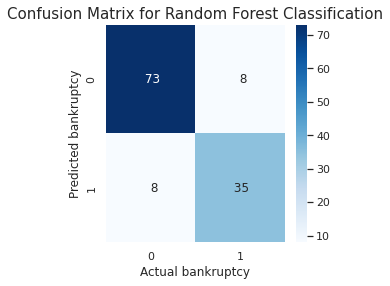

In [77]:
#getting confusion matrix
y_hat_rf = best_rf.predict(Xt)
cm = confusion_matrix(yt,y_hat_rf)
print(cm)
#visualize confusion matrix 
sns.heatmap(confusion_matrix(yt, y_hat_rf),annot=True,fmt='3.0f',cmap="Blues")
plt.title('Confusion Matrix for Random Forest Classification', y=1.05, size=15)
plt.ylabel('Predicted bankruptcy')
plt.xlabel('Actual bankruptcy')

#checking accuracy
rfa = accuracy_score(yt,y_hat_rf)
print('accuracy score = ',accuracy_score(yt,y_hat_rf))
print(classification_report(yt,y_hat_rf))
print("F1 Score :",round((f1_score(yt, y_hat_rf))*100,2))


## Gradient Boosted Trees

In [78]:
%%time
gb1 = GradientBoostingClassifier()
#(n_estimators = 60, criterion = 'entropy',random_state = 0)

# define gridsearch parameters
param_grid = {
              'n_estimators': [70,100],
              'max_features': ['auto', 'log2'],
              'max_depth': [3, 5],
              'min_samples_split': [5, 8],
              'min_samples_leaf': [5, 8],
              'learning_rate': [0.01,0.1,0.5]}

# instantiate gridsearchcv class
gb = GridSearchCV(estimator=gb1,
                    param_grid=param_grid,
                    cv=5,
                    verbose=3,
                    n_jobs=-1)


gb_fit = gb.fit(X_train,y_train)

# Get the estimator
best_gb = gb_fit.best_estimator_
best_gb

Fitting 5 folds for each of 96 candidates, totalling 480 fits
CPU times: user 2.46 s, sys: 55 ms, total: 2.52 s
Wall time: 27.2 s


In [79]:
# Make predictions using the unoptimized and model
predictions = (gb1.fit(X_train, y_train)).predict(X_test)
best_predictions = best_gb.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

Unoptimized model
------
Accuracy score on testing data: 0.8906
F-score on testing data: 0.8889

Optimized Model
------
Final accuracy score on the testing data: 0.9062
Final F-score on the testing data: 0.9121


Text(0.5, 1.05, 'Confusion Matrix for Random Forest Classification')

Text(12.5, 0.5, 'Predicted bankruptcy')

Text(0.5, 12.5, 'Actual bankruptcy')

accuracy score =  0.90625
              precision    recall  f1-score   support

           0       0.90      0.92      0.91        65
           1       0.92      0.89      0.90        63

    accuracy                           0.91       128
   macro avg       0.91      0.91      0.91       128
weighted avg       0.91      0.91      0.91       128

F1 Score : 90.32


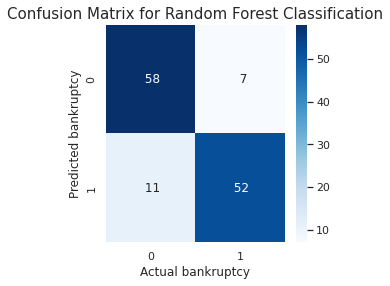

In [80]:
#getting confusion matrix
y_pred = gb.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
#visualize confusion matrix 
sns.heatmap(confusion_matrix(y_test, y_hat_test),annot=True,fmt='3.0f',cmap="Blues")
plt.title('Confusion Matrix for Random Forest Classification', y=1.05, size=15)
plt.ylabel('Predicted bankruptcy')
plt.xlabel('Actual bankruptcy')

#checking accuracy
gba = accuracy_score(y_test,y_pred)
print('accuracy score = ',accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("F1 Score :",round((f1_score(y_test, y_pred))*100,2))


In [81]:
#K-fold cross validation
kfold = model_selection.KFold(n_splits=10)
model_kfold = RandomForestClassifier()
results_kfold = model_selection.cross_val_score(model_kfold, X, y, cv=kfold)
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0)) 

Accuracy: 90.60%


In [82]:
# Stratified K-fold Cross-Validation

skfold = StratifiedKFold(n_splits=3)
model_skfold = RandomForestClassifier()
results_skfold = model_selection.cross_val_score(model_skfold, X, y, cv=skfold)
print("Accuracy: %.2f%%" % (results_skfold.mean()*100.0))

Accuracy: 90.44%


In [83]:
# # Leave One Out Cross-Validation (LOOCV)

# loocv = model_selection.LeaveOneOut()
# model_loocv = RandomForestClassifier()
# results_loocv = model_selection.cross_val_score(model_loocv, X, y, cv=loocv)
# print("Accuracy: %.2f%%" % (results_loocv.mean()*100.0))

### Gradient Boosted Validation

[[74  7]
 [ 6 37]]


Text(0.5, 1.05, 'Confusion Matrix for Gradient Boosted')

Text(12.5, 0.5, 'Predicted bankruptcy')

Text(0.5, 12.5, 'Actual bankruptcy')

accuracy score =  0.8951612903225806
              precision    recall  f1-score   support

           0       0.93      0.91      0.92        81
           1       0.84      0.86      0.85        43

    accuracy                           0.90       124
   macro avg       0.88      0.89      0.88       124
weighted avg       0.90      0.90      0.90       124

F1 Score : 85.06


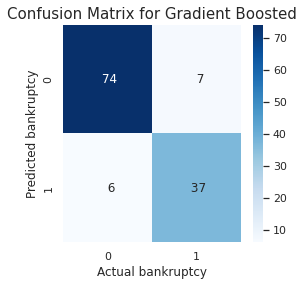

In [84]:
#getting confusion matrix
y_hat_gb = best_gb.predict(Xt)
cm = confusion_matrix(yt,y_hat_gb)
print(cm)
#visualize confusion matrix 
sns.heatmap(confusion_matrix(yt, y_hat_gb),annot=True,fmt='3.0f',cmap="Blues")
plt.title('Confusion Matrix for Gradient Boosted', y=1.05, size=15)
plt.ylabel('Predicted bankruptcy')
plt.xlabel('Actual bankruptcy')

#checking accuracy
rfa = accuracy_score(yt,y_hat_gb)
print('accuracy score = ',accuracy_score(yt,y_hat_gb))
print(classification_report(yt,y_hat_gb))
print("F1 Score :",round((f1_score(yt, y_hat_gb))*100,2))


## Extra Trees

In [85]:
%%time
et1 = ExtraTreesClassifier()
#(n_estimators = 60, criterion = 'entropy',random_state = 0)

# define gridsearch parameters
param_grid = { 'criterion' : ['gini', 'entropy'],
              'n_estimators': [50, 100],
              'max_features': ['auto', 'log2'],
              'max_depth': [3, 5, 7],
              'min_samples_split': [5, 11],
              'min_samples_leaf': [5, 11]}

# instantiate gridsearchcv class
et = GridSearchCV(estimator=et1,
                    param_grid=param_grid,
                    cv=5,
                    verbose=3,
                    n_jobs=-1)


et_fit = et.fit(X_train,y_train)

# Get the estimator
best_et = et_fit.best_estimator_
best_et

Fitting 5 folds for each of 96 candidates, totalling 480 fits
CPU times: user 1.62 s, sys: 31.5 ms, total: 1.65 s
Wall time: 15.9 s


In [86]:
# Make predictions using the unoptimized and model
predictions = (et1.fit(X_train, y_train)).predict(X_test)
best_predictions = best_et.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

Unoptimized model
------
Accuracy score on testing data: 0.9219
F-score on testing data: 0.9206

Optimized Model
------
Final accuracy score on the testing data: 0.8828
Final F-score on the testing data: 0.8777


Text(0.5, 1.05, 'Confusion Matrix for Extra Trees Classification')

Text(12.5, 0.5, 'Predicted bankruptcy')

Text(0.5, 12.5, 'Actual bankruptcy')

accuracy score =  0.8828125
              precision    recall  f1-score   support

           0       0.89      0.88      0.88        65
           1       0.88      0.89      0.88        63

    accuracy                           0.88       128
   macro avg       0.88      0.88      0.88       128
weighted avg       0.88      0.88      0.88       128

F1 Score : 88.19


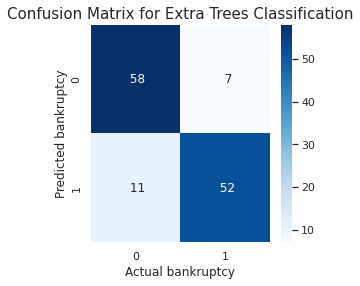

In [94]:
#getting confusion matrix
y_pred = et.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
#visualize confusion matrix 
sns.heatmap(confusion_matrix(y_test, y_hat_test),annot=True,fmt='3.0f',cmap="Blues")
plt.title('Confusion Matrix for Extra Trees Classification', y=1.05, size=15)
plt.ylabel('Predicted bankruptcy')
plt.xlabel('Actual bankruptcy')

#checking accuracy
eta = accuracy_score(y_test,y_pred)
print('accuracy score = ',accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("F1 Score :",round((f1_score(y_test, y_pred))*100,2))



In [95]:
#K-fold cross validation
kfold = model_selection.KFold(n_splits=10)
model_kfold = RandomForestClassifier()
results_kfold = model_selection.cross_val_score(model_kfold, X, y, cv=kfold)
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0)) 

Accuracy: 90.44%


In [96]:
# Stratified K-fold Cross-Validation

skfold = StratifiedKFold(n_splits=3)
model_skfold = RandomForestClassifier()
results_skfold = model_selection.cross_val_score(model_skfold, X, y, cv=skfold)
print("Accuracy: %.2f%%" % (results_skfold.mean()*100.0))

Accuracy: 90.75%


In [97]:
# # Leave One Out Cross-Validation (LOOCV)

# loocv = model_selection.LeaveOneOut()
# model_loocv = RandomForestClassifier()
# results_loocv = model_selection.cross_val_score(model_loocv, X, y, cv=loocv)
# print("Accuracy: %.2f%%" % (results_loocv.mean()*100.0))

### Extra Tree Validation

[[72  9]
 [ 7 36]]


Text(0.5, 1.05, 'Confusion Matrix for Extra Trees Classification')

Text(12.5, 0.5, 'Predicted bankruptcy')

Text(0.5, 12.5, 'Actual bankruptcy')

accuracy score =  0.8709677419354839
              precision    recall  f1-score   support

           0       0.91      0.89      0.90        81
           1       0.80      0.84      0.82        43

    accuracy                           0.87       124
   macro avg       0.86      0.86      0.86       124
weighted avg       0.87      0.87      0.87       124

F1 Score : 81.82


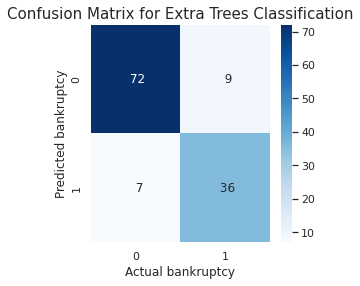

In [98]:
#getting confusion matrix
y_hat_et = best_et.predict(Xt)
cm = confusion_matrix(yt,y_hat_et)
print(cm)
#visualize confusion matrix 
sns.heatmap(confusion_matrix(yt, y_hat_et),annot=True,fmt='3.0f',cmap="Blues")
plt.title('Confusion Matrix for Extra Trees Classification', y=1.05, size=15)
plt.ylabel('Predicted bankruptcy')
plt.xlabel('Actual bankruptcy')

#checking accuracy
eta = accuracy_score(yt,y_hat_et)
print('accuracy score = ',accuracy_score(yt,y_hat_et))
print(classification_report(yt,y_hat_et))
print("F1 Score :",round((f1_score(yt, y_hat_et))*100,2))



#Conclusion


 - The cross-validation technique improves the model's performance and is a better validation strategy. We can further improve the model by doing exploratory data analysis, data pre-processing, feature engineering, or trying out different machine learning algorithms



#References:

 - https://scikit-learn.org/stable/modules/svm.html
 - https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
 


